# Non-Isothermal Packed Bed Reactor


**Prepared by**: Fathya Salih (fsalih@nd.edu) and Connor Schmidt (cschmid9@nd.edu)



**Reference**: Problem 11-7, Elements of Chemical Reaction Engineering, Fifth Edition by H. Scott Fogler.

**Intended Audience**: Chemical Engineering undergraduate seniors who have studied reaction engineering, but may not have touched on non-ideal reactors. 

This problem is meant to provide practice for designing real reactors where running them at isothermal conditions is not always feasible and the kinetics are limited by equilibrium. The ultimate question to be answered is "*what's the best way of controlling the reaction temperature if a cooling jacket is not feasible?*"



## Learning Objectives:

- Practice diagramming and labeling the problem
- Deriving the mass and energy balance equations to the given forms.
- To practice solving ODEs using `scipy.integrate.solve_ivp()`
- To practice plotting multiple series using for-loops
- To study the effects of thermal non-idealities on reactor performance


## Relevant Resources:
1. Elements of Chemical Reaction Engineering, Fifth Edition by H. Scott Fogler
2. [The class website](https://ndcbe.github.io/data-and-computing/intro.html), especially the notebook on [reaction rates](https://ndcbe.github.io/data-and-computing/notebooks/07/Example-Reaction-Rates.html)


## Problem Statement

*Modified from: Problem 11-7, Elements of Chemical Reaction Engineering, Fifth Edition by H. Scott Fogler*


The gas-phase reversible reaction:

\begin{equation}
A \rightarrow B
\end{equation}

is carried out under high pressure (150 bar at the inlet) in a packed-bed reactor with pressure drop. The feed consists of both inerts $I$ and species $A$ at a 2 to 1 ratio. The entering molar flow rate of A is 5 mol/min at a temperature of 300 K and a concentration of 2 mol/L. Work this problem in terms of volume ($V \rho_B=W$, and $r_i [\frac{mol\  'i'\  produced}{time . vol_{reactor}}] = r_i' [\frac{mol\  'i'\  produced}{min . kg_{cat}}]*\rho [\frac{kg_{cat}}{vol_{reactor}}]$).


|Additional Information           ||  |
|-----------------------------------||---------------------------------|
|**Inlet Conditions**             || **Kinetic Parameters**            |
|$F_{A0}=$ 5.0 [mol/min]            ||  $k_1=$ 0.1 [min$^{-1}$] at 300 K |
|$C_{A0}=$ 2 [mol/dm$^3$]             || $K_C =$ 1000 [-] at 300 K       |
|$C_{I0}= Θ_I C_{A0}$; $Θ_I = 2$   || $E =$ 10,000 [cal/mol]          |
|$T_{0}=$ 300 [K]                   || **Energy Equation Parameters**    |
|**Reactor Properties**           || $ΔH_{Rxn}=$ -20,000 [cal/mol of A] |
|$V=$ 40 [dm$^3$]                     || $C_{p,I} =$ 18 [cal/mol.K]  |
|$α ρ_B=$ 0.02 [dm$^{-3}$]              || $C_{p,A} =$ 160 [cal/mol.K] |
|$ρ_B=$ 1.2 [kg/dm$^3$]               || $C_{p,B} =$ 160 [cal/mol.K] |

Considering adiabatic operation,

1. Derive the mole and energy balance equations for a PBR.

2. Solve the system of ODEs (assembled using the provided hints) numerically for the given parameters and plot profiles for $X$, $X_e$, $T$, $p$ and $-r_A$ over reactor volume.

3. Analyze the effect of heat capacities and pressure drop using parametric sweeps.

4. Analyze the effect of inlet temperature ($T_0$) and the inlet fraction of inerts ($\Theta_I$) using parametric sweeps. Then, find the optimal combination of $T_0$ and $\Theta_I$ that controls the reaction temprature to maximize conversion.



## Hints



### A) Algorithm

*Fogler* provides algorithms or a sequence of assembling equations needed to design different kinds of reactors. The equations below are the algorithm for designing a non-isobaric non-isothermal reactor.

__1. Mole Balance__

The design equation (mole balance equation) of a gas reaction in a PBR is most conveniently written in terms of molar flow rates and catalyst weight, so that for component ‘$i$’,

\begin{equation}
\frac{dF_i}{dW} = r'_i
\end{equation}

Where $r'_i$ is the rate of production of component ‘$i$’ per unit of catalyst mass.

__2. Rate Law__

Only one reaction occurs in this system, and it can be written in terms of component '$A$', since it is the only reactant (and hence the limiting reactant).

The rate of *production* of '$A$' is:
\begin{equation}
r'_A = - k_1 \left[ C_A - \frac{C_B}{K_c} \right]
\end{equation}

Where:

\begin{equation}
k_1(T) = k_1(T_1) exp \left[ \frac{E}{R} \left( \frac{1}{T_1} - \frac{1}{T} \right) \right]
\end{equation}

\begin{equation}
K_c(T) = K_c(T_2) exp \left[ \frac{ΔH_{rxn}}{R} \left( \frac{1}{T_2} - \frac{1}{T} \right) \right]
\end{equation}

__3. Stoichiometry__

From the reaction stoichiometry, the rate of production of component 'B' is:
\begin{equation}
\frac{r'_B}{v_B} = \frac{r'_A}{v_A}
\end{equation}

Where the stoichiometric coefficients are $v_A=-1$ and $v_B=1$, leaving

\begin{equation}
r'_B = - r'_A
\end{equation}

And for the inert,
\begin{equation}
r'_I = 0
\end{equation}

Also, reaction rates ($r'_i$) need to be expressed in terms of molar flowrates to match the mole balance equation.

Thus, applying the ideal gas law, concentrations can be written as:
\begin{equation}
C_A  = C_{T0} \frac{F_A}{F_{T0}} \frac{T_0}{T} \frac{P}{P_0}
\end{equation}

\begin{equation}
C_B  = C_{T0} \frac{F_B}{F_{T0}} \frac{T_0}{T} \frac{P}{P_0}
\end{equation}

\begin{equation}
C_I  = C_{T0} \frac{F_I}{F_{T0}} \frac{T_0}{T} \frac{P}{P_0}
\end{equation}

Where $C_{T0}$ is the total molar concentration at the inlet, meaning:
\begin{equation}
C_{T0} = \frac{P_0}{R T_0}
\end{equation}

__4. Energy Balance__

For an adiabatic PBR (no heat added or removed),

\begin{equation}
\frac{dT}{dW} = \frac{r'_A ΔH_{rxn}}{\sum\limits_i F_i C_{p,i}}
\end{equation}

Where:
$\Delta H_{rxn} \equiv$ the heat released by the reaction per mole of '$A$' reacted/consumed, and is a function of temperature

__5. Pressure Drop Equation__

The pressure drop through a packed bed can be described using the following form of the Ergun equation

\begin{equation}
\frac{dp}{dW} = -\frac{α}{2p} \frac{F_T}{F_{T0}} \frac{T}{T_0}
\end{equation}

Where:

$p \equiv$ The pressure ratio ($P/P_0$) [dimensionless]

$\alpha \equiv$ pressure ratio drop per unit mass of catalyst mass [$kg_{cat}^{-1}$]

$\alpha$ lumps a number of packed bed parameters and important material properties like void fraction, particle size, gas viscosity ,etc. It is used here to simplify using the Ergun equation.

### B) Additional Equations and Parameters

**1. Equilibrium Conversion**

Eqilibrium conversion is calculated at equilibrium, where the net rate of reaction is zero. Setting $r'_A=0$ in the equation provided above yeilds:

\begin{equation}
X_e = \frac{K_c}{1+K_c}
\end{equation}

**2. Temperature Dependence**

The temperature dependence of the heat of reaction can be written using a known value for $\Delta H_{rxn}$ at a reference temperature $T_R$

\begin{equation}
\Delta H_{rxn}(T) = \Delta H_{rxn}(T_R) + \Delta C_p (T-T_R)
\end{equation}

Where $\Delta C_p$ lumps the temperature dependence 
\begin{equation}
\Delta C_p = \sum\limits_i v_i C_{p,i}
\end{equation}

## 1. Derivation of Mole and Energy Balances

### 1a. Sketch & Control Volume 

Draw a sketch of a PBR and on the sketch, select an appropriate control volume and indicate the selected volume on the sketch

![](https://ndcbe.github.io/data-and-computing/_images/PBR_Sketch.png)

### 1b. Mole Balance

Apply a mole balance on component ‘$i$’ in the selected control volume and attempt to produce the mole balance equation provided in the hints


![](PBR_Mole_Balance.png)


The mole balance for each component on the selected control volume can be written as:

\begin{equation}
F_{i_{in}} - F_{i_{out}} + F_{i_{gen}} = F_{i_{accumulation}}
\end{equation}

But, 
- $F_{i_{accumulation}}$ is 0 at steady state
- Generation is $r'_i\Delta W$

So we can rewrite as:
\begin{equation}
F_{i_{in}} - F_{i_{out}} + r'_i\Delta W = 0
\end{equation}

Where $r'_i$ is rate of production of component ‘i’ per unit of catalyst mass, $F_{i_{in}}$ and $F_{i_{out}}$ are the molar flow rates in and out of the reactor for component 'i'.

Solving for $r'_i$ we find 

\begin{equation}
r'_i = \frac{-(F_{i_{in}} - F_{i_{out}})}{\Delta W}
\end{equation}

With infinitely small $\Delta W$ we arrive at the mole balance equation provided in the hints:
\begin{equation}
r'_i = \frac{dF_i }{ dW }
\end{equation}

### 1c. Energy Balance

Apply an energy balance on the selected control volume and attempt to produce the energy balance equation provided in the hints

![PBR_Energy_Balance.png](https://ndcbe.github.io/data-and-computing/_images/PBR_Energy_Balance.png)


The energy balance on the selected control volume can be written as:

\begin{equation}
\dot{H}_{in} - \dot{H}_{out} + \dot{Q}_{ext} ΔV = Q_{accumulation}
\end{equation}

At steady state, $Q_{accumulation}=0$, leaving:
\begin{equation}
\dot{H}_{in} - \dot{H}_{out} + \dot{Q}_{ext} ΔV = 0
\end{equation}

Where
$\dot{H}_{in}$ and $\dot{H}_{out}$ are the enthalpies of the streams entering and leaving the control volume. And $\dot{Q}_{ext}$ is the heat added from external sources per unit volume. So that:

$\dot{H}_{in} =  \sum\limits_{comp,i} F_i \bar{H}_i \bigg|_{W}
$

$\dot{H}_{out} =  \sum\limits_{comp,i} F_i \bar{H}_i \bigg|_{W+ΔW}
$

$\dot{Q}_{ext} ΔV = \frac{\dot{Q}_{ext}}{ρ_B} ΔW
$

Combining,

\begin{equation}
\sum\limits_{comp,i} F_i \bar{H}_i \Big|_{W} 
- \sum\limits_{comp,i} F_i \bar{H}_i \Big|_{W+ΔW} 
+ \frac{\dot{Q}_{ext}}{ρ_B} ΔW = 0
\end{equation}

Dividing through by $ΔW$,

\begin{equation}
\sum\limits_{comp,i} \frac{F_i \bar{H}_i \Big|_{W}- F_i \bar{H}_i \Big|_{W+ΔW}}{ΔW}
+ \frac{\dot{Q}_{ext}}{ρ_B}= 0
\end{equation}

Taking the limit as $ΔW ⟶ ∞$,

\begin{equation}
 \frac{d}{dW} \left[ \sum\limits_{comp,i} F_i \bar{H}_i \right]
+ \frac{\dot{Q}_{ext}}{ρ_B}= 0
\end{equation}

Taking the derivative of the sum and applying the product rule to each term,

\begin{equation}
 \sum\limits_{comp,i} \left[ \frac{dF_i}{dW} \bar{H}_i + \frac{d\bar{H}_i}{dW} F_i \right]
+ \frac{\dot{Q}_{ext}}{ρ_B}= 0
\end{equation}

By definiton, $dF_i/dW = r'_i$. And taking component $A$ as a reference component in the reaction $A + \frac{b}{a} B ⟶ \frac{c}{a} C + \frac{d}{a} D$, the rate equations for other components can be written using their stoichiometric coefficients '$v_i$' (e.g. $v_B=b/a$). Thus:

\begin{equation}
\frac{dF_i}{dW} = v_i (-r'_A)
\end{equation}

Using the chain rule on the derivative $\frac{d\bar{H}_i}{dW}$,

\begin{equation}
\frac{d\bar{H}_i}{dW} = \frac{dT}{dW} \frac{d\bar{H}_i}{dT} = \frac{dT}{dW} \bar{C}_{p,i}
\end{equation}

Combining,

\begin{equation}
 \sum\limits_{comp,i} \bar{H}_i v_i (-r'_A)
+ \sum\limits_{comp,i} \frac{dT}{dW} F_i \bar{C}_{p,i}
+ \frac{\dot{Q}_{ext}}{ρ_B}= 0
\end{equation}

\begin{equation}
 -r'_A \sum\limits_{comp,i} \bar{H}_i v_i 
+ \frac{dT}{dW} \sum\limits_{comp,i} F_i \bar{C}_{p,i}
+ \frac{\dot{Q}_{ext}}{ρ_B}= 0
\end{equation}

Substituting for the definition of heat of reaction ($ΔH_{rxn}=\sum\limits_{comp,i} \bar{H}_i v_i$) and rearranging,

\begin{equation}
 \frac{dT}{dW} = \frac{r'_A ΔH_{rxn} + \dot{Q}_{ext}/ρ_B}{\sum\limits_{comp,i} F_i \bar{C}_{p,i}}
\end{equation}

This can be interpreted as:

\begin{equation}
 \frac{dT}{dW} = \frac{\dot{Q}_{gen} + \dot{Q}_{added}}{C_{p,overall}}
\end{equation}

## 2. Solving the system of Equations Numerically

Solve using `scipy.integrate.solve_ivp()`

For information on using scipy:
https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html


In [ ]:
# Importing libraries
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In the code below we declare all the known parameters and then create a function setting up the ODEs, before solving them with `scipy.integrate.solve_ivp()` Most of the code is prepared, but the equations derived in part 1 must be added as the student solution.

In [ ]:
def pbr_odes(W,y):
    ''' Function that returns the RHS of the ODEs for the ODE solver 
    Arguments:
        y: Vector of dependent variables
        W: Independent variable

    Returns:
        dydW: Vector of derivatives of dependent variables
    '''
    # Unpacking vector of dependent variables
    p, T, F_A, F_B, F_I = y

    # Initializing and naming vector of derivatives
    dydW = np.zeros(len(y))

    # Energy equation parameters ------------------------------------------------
    T_R = 300       #[K] - reference temperature
    H_rxn = -20000  #[cal/mol] - heat of reaction at 300 K
    C_pA = 160      #[cal/mol.K] - heat capacity at const pressure of component A (assuming Cp are weak functions of temperature)
    C_pB = 160      #[cal/mol.K] - heat capacity at const pressure of component B
    C_pI = 18       #[cal/mol.K] - heat capacity at const pressure of component I

    # Stoichiometry & rate law --------------------------------------------------
    F_T = F_A + F_B + F_I               #[mol/min] - Total molar flowrate
    C_T0 = 150/0.082/T0                 #[mol/dm^3] - assuming a 'high' inlet pressure of 150 atm
    C_A = C_T0 * F_A/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component A
    C_B = C_T0 * F_B/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component B
    C_I = C_T0 * F_I/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component I

    # Rate law & kinetic parameters ---------------------------------------------
    R_E = 1.9872    #[cal/mol.K] - universal gas constant for energy equation
    E = 10000       #[cal/mol] - activation energy at 300 K
    k1 = 0.1 * np.exp(E/R_E*(1/300 - 1/T))          #[min^-1] - reaction rate constant
    Kc = 1000 * np.exp(H_rxn/R_E*(1/300 - 1/T))     #[-] - equilibrium constant

    r_A = -(k1/rho_b * (C_A - 1/Kc * C_B))   #[mol/min.kg_cat] - rate of production of component A
    r_B = -r_A  #[mol/min.kg_cat] - rate of production of component B
    r_I = 0     #[mol/min.kg_cat] - rate of production of component I
    
    # Mole Balance Equations ----------------------------------------------------
    # Add your solution here

    # Energy Balance Equation ---------------------------------------------------
    # Add your solution here

    dTdW = Q_gen/Fi_Cpi

    # Pressure Drop Equation ----------------------------------------------------
    # Add your solution here

    # Placing ODEs back into the vector dydW ------------------------------------
    dydW = np.array([dpdW, dTdW, dF_AdW, dF_BdW, dF_IdW])

    return dydW / rho_b     # changing the basis of differentiation to volume

# Solving the system of ODEs 
# -------------------------------------------------------------------------------
# Inlet conditions
theta_I = 2         #[mol_I/mol_A] - ratio of inert concentration to concentration of 'A' in the inlet
theta_B = 0         #[mol_B/mol_A] - ratio of product concentration to concentration of 'A' in the inlet
C_A0 = 2            #[mol/L] - inlet concentration of A
C_B0 = theta_B*C_A0 #[mol/L] - inlet concentration of B
C_I0 = theta_I*C_A0 #[mol/L] - inlet concentration of I (inerts)

F_A0 = 5            #[mol/min] - inlet molar flowrate of A
F_I0 = theta_I*F_A0 #[mol/min] - inlet molar flowrate of B
F_B0 = 0            #[mol/min] - inlet molar flowrate of I
F_T0 = F_A0 + F_B0 + F_I0  #[mol/min] - total inlet molar flowrate

T0 = 300            #[K] - Inlet temperature

# Defining initial conditions
y0 = [1, T0, F_A0, F_B0, F_I0]

# Reactor properties
rho_b = 1.2         #[kg_cat/L] - bulk density
alpha = 0.02/rho_b  #[kg_cat^-1] - pressure ratio drop per unit catalyst mass
V = 40              #[L] - total reactor volume

# Integrating using an explicit RK method
sol = sp.integrate.solve_ivp(pbr_odes, [0, V], y0, method='RK45')


## 3. Analysis of Results



### 3a. Visualization


For information on making quality plots see: https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html


#### i) Python Function  

Write a function that calculates $X$, $X_e$ and $-r_A$ for a given set of parameters of interest ($T_0$, $\Theta_I$, $\alpha$, $C_{p,A}$, $C_{p,B}$, $C_{p,I}$)

Much of the coding is provided, but to be completed sections include:

- Equations from part 1 must be added to pbr_odes_mod as was done in part 2
- Calculations of conversion, reaction rate, and equilibrium conversion.
 

In [ ]:
def solve_pbr(param):
    ''' A function that solves the PBR model given a set of parameters of interest and returns conversions, reaction rate temperature and pressure
    Arguments: 
        param: Vector of parameters of interest (to be varied)

    Returns:
        V_range: reactor volume values solution is stored at [dm^3] - vector
        X_prof: conversion profile of component A [-] - vector
        Xe_prof: equilibrium conversion profile [-] - vector
        rA_prof: rate of production of component A [mol A/(min.dm^3)] - vector
        T: temperature profile [K] - vector
        p: pressure ratio profile [-] - vector
    
    '''
    # Extracting parameters of interest
    T0, theta_I, alpha, C_pA, C_pB, C_pI = param

    # Defining a new version of `pbr_odes()` that allows for parameters to be taken from the provided param list
    def pbr_odes_mod(W,y):
        ''' Function that returns the RHS of the ODEs for the ODE solver and takes T0, theta_I, alpha, C_pA, C_pB, C_p from the parent function
        Arguments:
            y: Vector of dependent variables
            W: Independent variable

        Returns:
            dydW: Vector of derivatives of dependent variables
        '''
        # Unpacking vector of dependent variables
        p, T, F_A, F_B, F_I = y

        # Initializing and naming vector of derivatives
        dydW = np.zeros(len(y))

        # Energy equation parameters ------------------------------------------------
        T_R = 300       #[K] - reference temperature
        H_rxn = -20000  #[cal/mol] - heat of reaction at 300 K
        # C_pA = 160      #[cal/mol.K] - heat capacity at const pressure of component A (assuming Cp are weak functions of temperature)
        # C_pB = 160      #[cal/mol.K] - heat capacity at const pressure of component B
        # C_pI = 18       #[cal/mol.K] - heat capacity at const pressure of component I

        # Stoichiometry & rate law --------------------------------------------------
        F_T = F_A + F_B + F_I               #[mol/min] - Total molar flowrate
        C_T0 = 150/0.082/T0                 #[mol/dm^3] - assuming a 'high' inlet pressure of 150 atm
        C_A = C_T0 * F_A/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component A
        C_B = C_T0 * F_B/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component B
        C_I = C_T0 * F_I/F_T0 * T0/T * p    #[mol/dm^3] - current concentration of component I

        # Rate law & kinetic parameters ---------------------------------------------
        R_E = 1.9872    #[cal/mol.K] - universal gas constant for energy equation
        E = 10000       #[cal/mol] - activation energy at 300 K
        k1 = 0.1 * np.exp(E/R_E*(1/300 - 1/T))          #[min^-1] - reaction rate constant
        Kc = 1000 * np.exp(H_rxn/R_E*(1/300 - 1/T))     #[-] - equilibrium constant

        r_A = -(k1/rho_b * (C_A - 1/Kc * C_B))   #[mol/min.kg_cat] - rate of production of component A
        r_B = -r_A  #[mol/min.kg_cat] - rate of production of component B
        r_I = 0     #[mol/min.kg_cat] - rate of production of component I
        
        # Mole Balance Equations ----------------------------------------------------
        # Add your solution here

        # Energy Balance Equation ---------------------------------------------------
        # Add your solution here

        dTdW = Q_gen/Fi_Cpi

        # Pressure Drop Equation ----------------------------------------------------
        # Add your solution here

        # Placing ODEs back into the vector dydW ------------------------------------
        dydW = np.array([dpdW, dTdW, dF_AdW, dF_BdW, dF_IdW])

        return dydW / rho_b     # changing the basis of differentiation to volume


    # Solving the system of ODEs 
    # -------------------------------------------------------------------------------
    # Inlet conditions
    # theta_I = 2         #[mol_I/mol_A] - ratio of inert concentration to concentration of 'A' in the inlet
    theta_B = 0         #[mol_B/mol_A] - ratio of product concentration to concentration of 'A' in the inlet
    C_A0 = 2            #[mol/L] - inlet concentration of A
    C_B0 = theta_B*C_A0 #[mol/L] - inlet concentration of B
    C_I0 = theta_I*C_A0 #[mol/L] - inlet concentration of I (inerts)

    F_A0 = 5            #[mol/min] - inlet molar flowrate of A
    F_I0 = theta_I*F_A0 #[mol/min] - inlet molar flowrate of B
    F_B0 = 0            #[mol/min] - inlet molar flowrate of I
    F_T0 = F_A0 + F_B0 + F_I0  #[mol/min] - total inlet molar flowrate

    # T0 = 300            #[K] - Inlet temperature

    # Defining initial conditions
    y0 = [1, T0, F_A0, F_B0, F_I0]

    # Reactor properties
    rho_b = 1.2         #[kg_cat/L] - bulk density
    alpha = 0.02/rho_b  #[kg_cat^-1] - pressure ratio drop per unit catalyst mass
    V = 40              #[L] - total reactor volume

    # Integrating using an explicit RK method
    sol = sp.integrate.solve_ivp(pbr_odes_mod, [0, V], y0, method='RK45', t_eval = np.arange(0, V, step=0.5))

    # Calculating relevant quantities 
    # -------------------------------------------------------------------------------
    # Extracting solutions
    V_range = sol.t     #[L]
    p, T, F_A, F_B, F_I = sol.y

    label = ['p', 'T', 'F_A', 'F_B', 'F_I']

    # Add your solution here

    return V_range, X_prof, Xe_prof, rA_prof, T, p

#### ii) Plotting

Create a 2x2 subplot figure for conversion ($X$ and $X_e$), $T$, $p$ and $-r_A$ profiles, (all plotted vs reactor volume) in distinct suplots. Use the written function for the solution from 2b

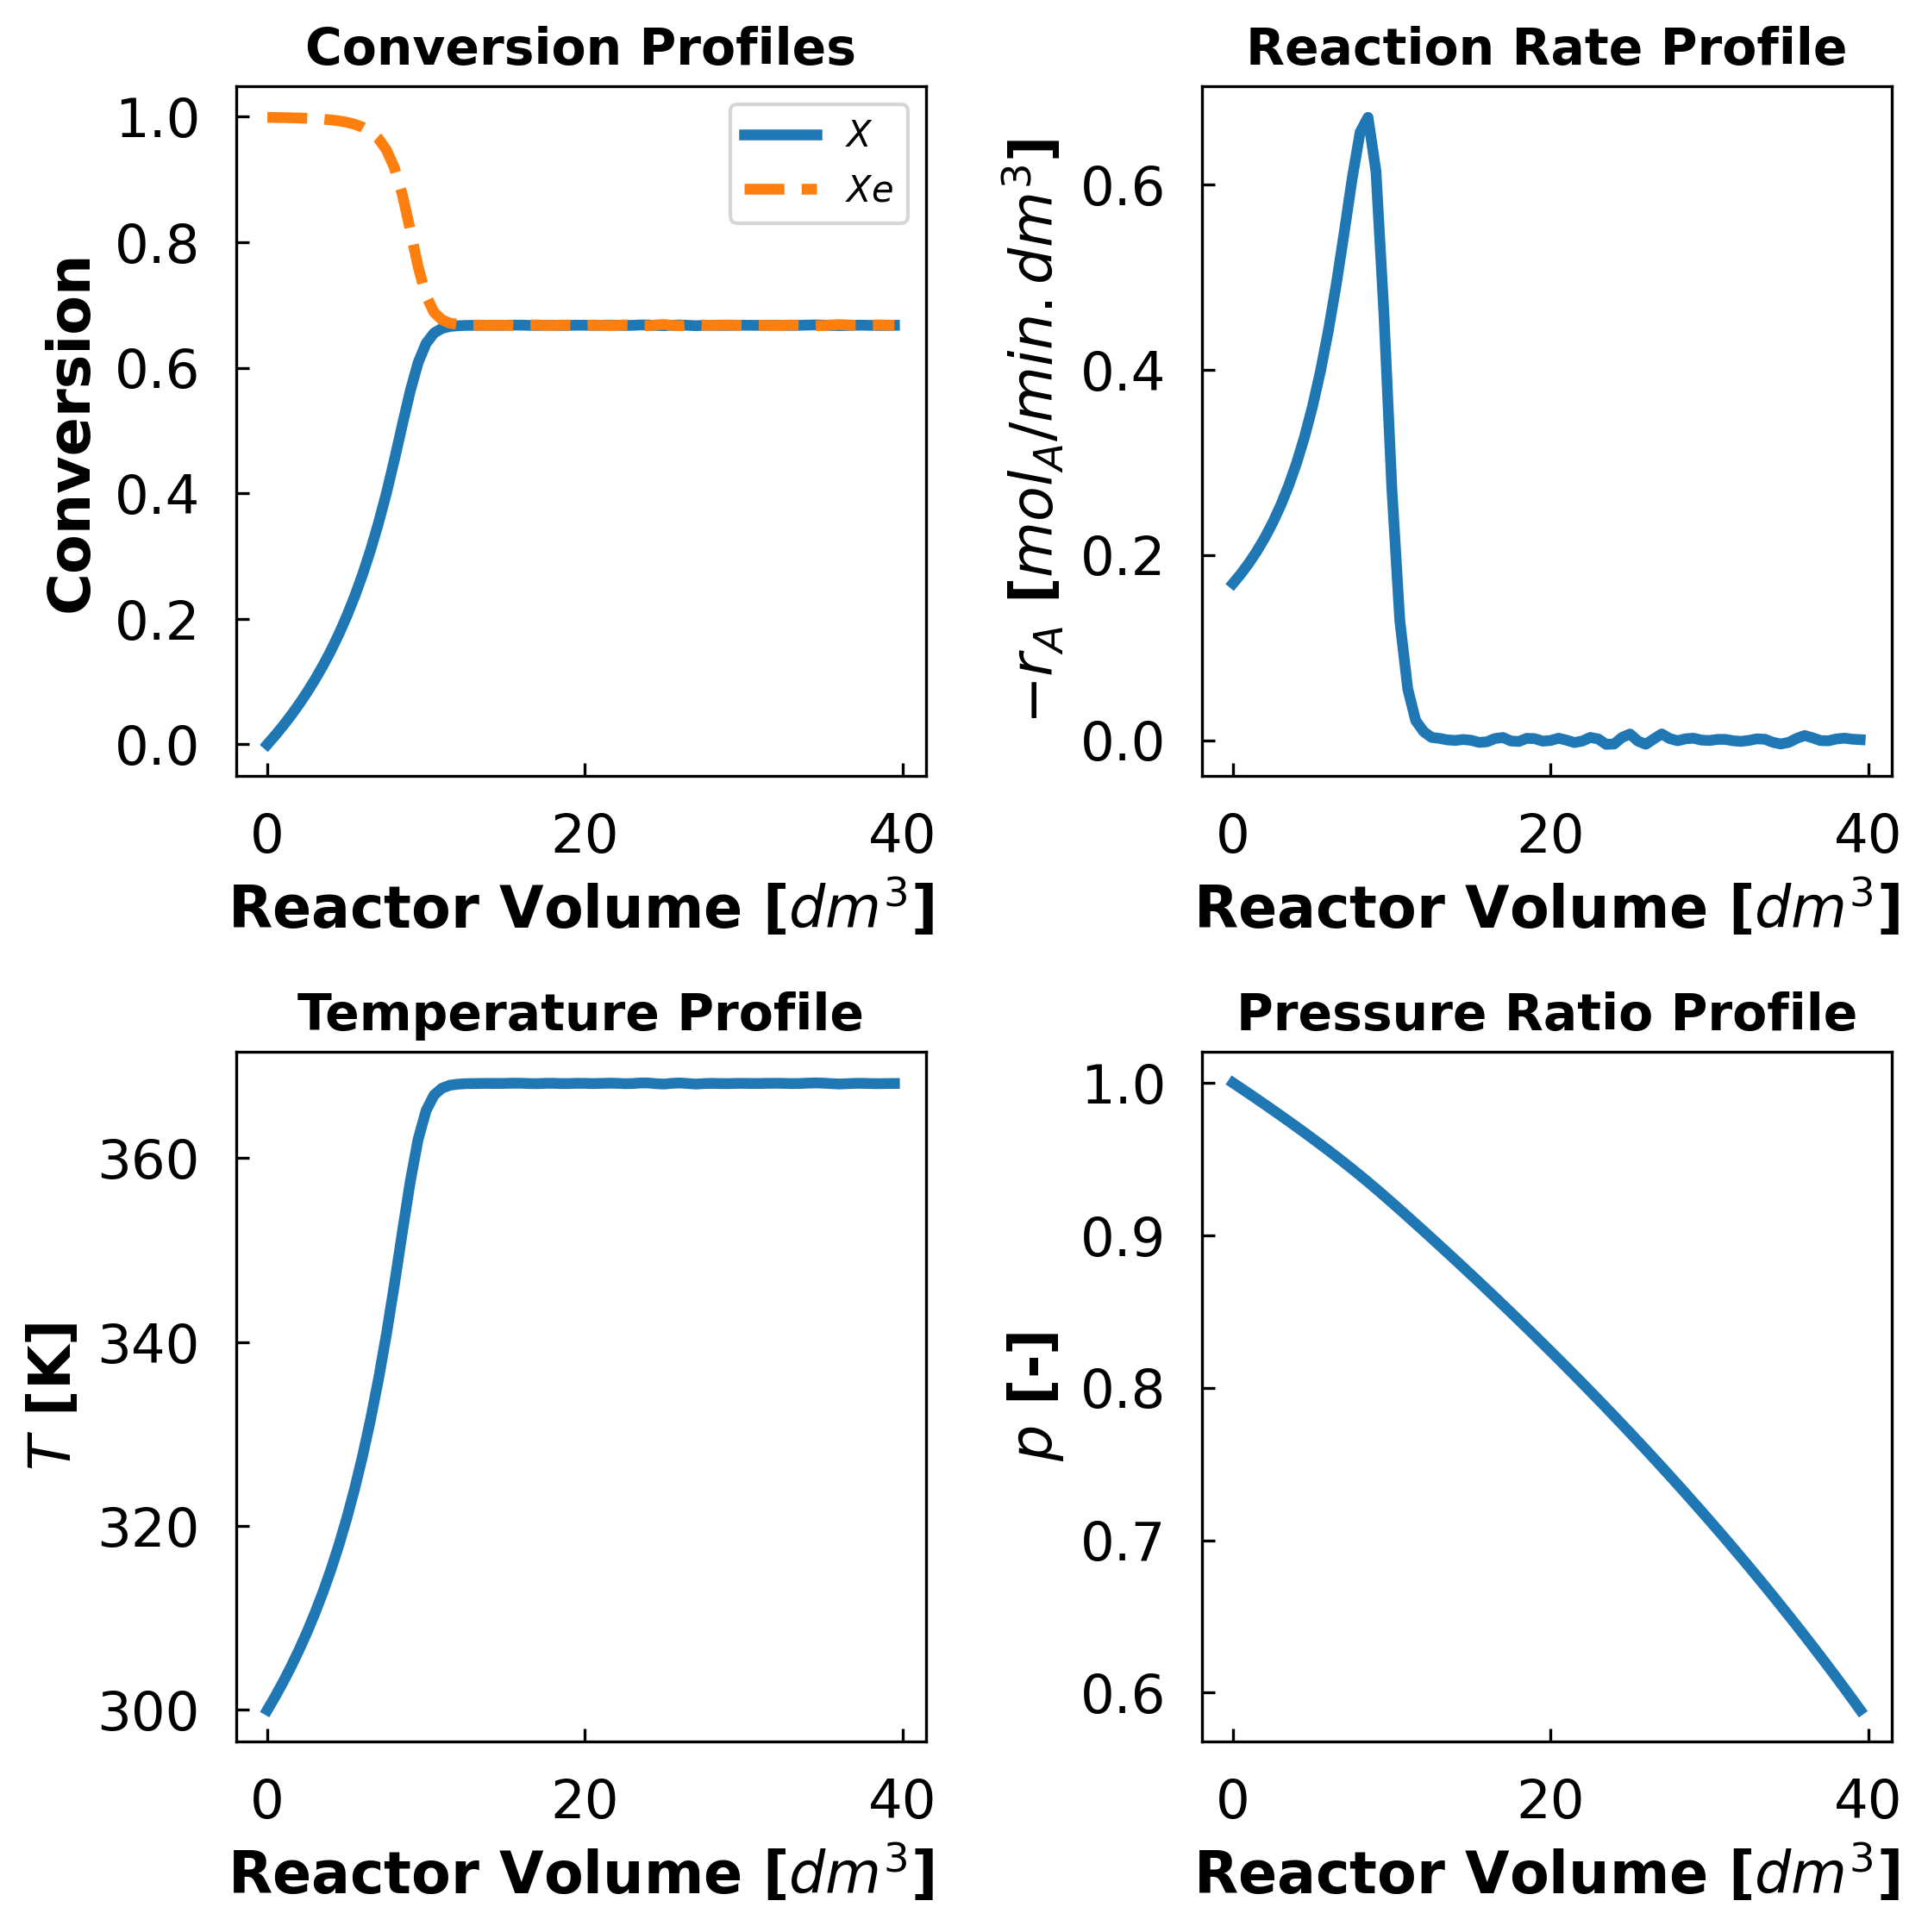

In [ ]:
# Defining parameters ------------------------------------------
params = [
    300,    # [K] - T0
    2,      # [mol_I/mol_A] - theta_I
    0.02,   # alpha, 
    160,    # [cal/mol.K] - C_pA, 
    160,    # [cal/mol.K] - C_pB, 
    18,     # [cal/mol.K] - C_pI, 
]

# Solving PBR model --------------------------------------------
V_range, X, Xe, rA, T, p = solve_pbr(params)

# Plotting -----------------------------------------------------
# Setting plot parameters
lin_wdth = 3
mrk_siz = 8

fig, axs = plt.subplots(2, 2, dpi = 300, figsize =(8,8))

# Add your solution here


### 3b. Effect of Heat Capacities


#### i) Numerical Solution

Solve for the case where $C_{P,B}$ is varied and plot conversion and temperature profiles for those cases

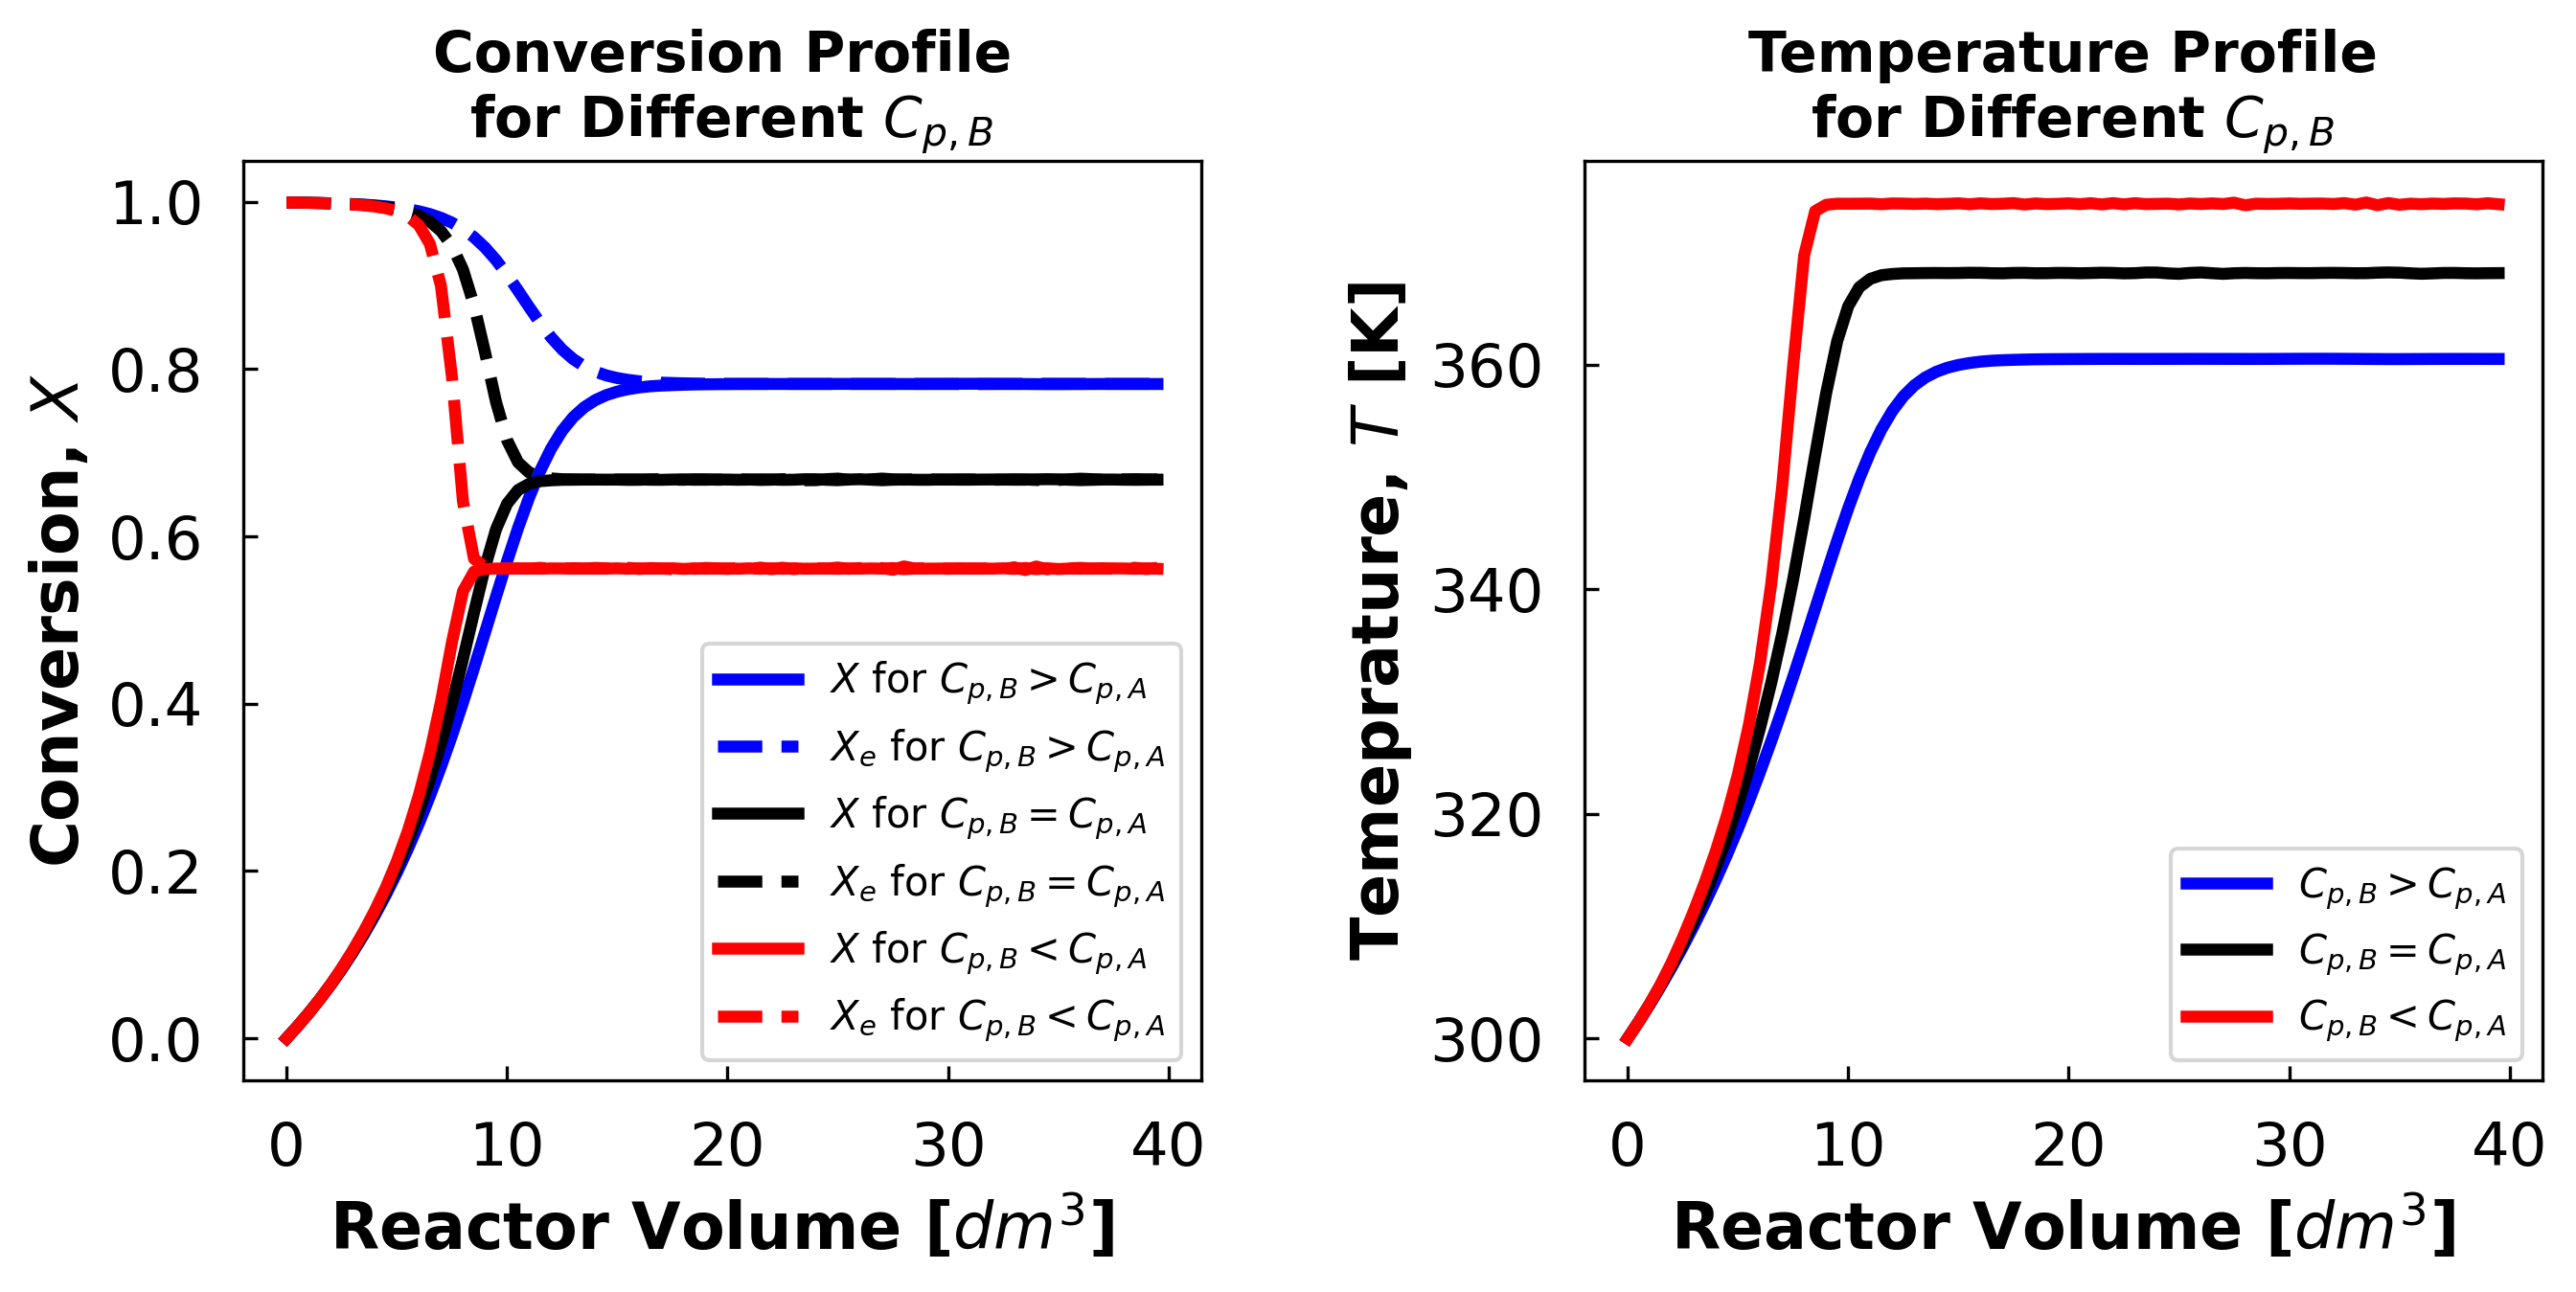

In [ ]:
# Setting up variables
labels =  [
    "$C_{p,B} > C_{p,A}$",
    "$C_{p,B} = C_{p,A}$",
    "$C_{p,B} < C_{p,A}$"
]

C_pB_levels = [240, 160, 80]

colors = ["blue", "black", "red"]

# Creating figure for subplot
fig, axs = plt.subplots(1, 2, dpi=300, figsize =(10,4))

# Plotting for different C_p,B
for i in range(len(labels)):
    params = [
        300,    # [K] - T0
        2,      # [mol_I/mol_A] - theta_I
        0.02,   # alpha, 
        160,    # [cal/mol.K] - C_pA, 
        C_pB_levels[i],    # [cal/mol.K] - C_pB, 
        18,     # [cal/mol.K] - C_pI, 
    ]

    V_range, X, Xe, rA, T, p = solve_pbr(params)

    axs[0].plot(
        V_range, -X,
        label = "$X$ for "+labels[i],
        linewidth = lin_wdth,
        color = colors[i]
    )

    axs[0].plot(
        V_range, Xe,
        '--',
        label = "$X_e$ for "+labels[i],
        linewidth = lin_wdth,
        color = colors[i]
    )

    axs[1].plot(
        V_range, T,
        label = labels[i],
        linewidth = lin_wdth,
        color = colors[i]
    )

# Additional plot elements
axs[0].set_title('Conversion Profile\n for Different $C_{p,B}$', fontsize = 14, fontweight = 'bold')
axs[0].set_xlabel('Reactor Volume [$dm^3$]', fontsize = 16, fontweight = 'bold')
axs[0].set_ylabel("Conversion, $X$", fontsize = 16, fontweight = 'bold')
axs[0].tick_params(axis='both', which='major', direction='in', pad = 10, labelsize = 15)
axs[0].legend();

axs[1].set_title('Temperature Profile\n for Different $C_{p,B}$', fontsize = 14, fontweight = 'bold')
axs[1].set_xlabel('Reactor Volume [$dm^3$]', fontsize = 16, fontweight = 'bold')
axs[1].set_ylabel('Temeprature, $T$ [K]', fontsize = 16, fontweight = 'bold')
axs[1].tick_params(axis='both', which='major', direction='in', pad = 10, labelsize = 15)
axs[1].legend();

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show();

In [ ]:
# Generalizing the plot recipe above in a function

def plot_profiles(x_name, x_ind, x_levels, y_plot, labels, LOUD=True):
    '''Creates a subplot of conversion profile and the profile of a property y_plot for different values of 'x'

    Arguments:
        x_name: name of the varaible of interest (String)
        x_ind: index of variable 'x' in the parameter list 'param' (integer)
        x_levels: values of 'x' to loop over (vector)
        y_plot: name of desired profile in plot
        labels: labels for plots

    Returns:
        none
    '''

    assert len(x_levels) == len(labels), 'list of labels and levels must be of the same length'
    assert (y_plot == 'Rate' or y_plot == 'Temperature' or y_plot == 'Pressure'), 'y_plot variable can only take the values "Rate" or "Temperature" or "Pressure"'
    
    # Setting up variables
    # labels =  [
    #     "$C_{p,B} > C_{p,A}$",
    #     "$C_{p,B} = C_{p,A}$",
    #     "$C_{p,B} < C_{p,A}$"
    # ]

    # C_pB_levels = [240, 160, 80]

    # colors = ["blue", "black", "red"]

    # Creating figure for subplot
    fig, axs = plt.subplots(1, 2, dpi=300, figsize =(10,4))

    # Checking desired y_plot variable
    if y_plot == 'Rate':
        y_index = 3
        ylabel = '$-r_A$ [$mol / kg_{cat} . min$]'
        title = f'Rate of Consumption of A Profiles\nfor Different {x_name}'

    elif y_plot == 'Temperature':
        y_index = 4
        ylabel = 'Temperature, $T$ [K]'
        title = f'Temperature Profiles\nfor Different {x_name}'

    elif y_plot == 'Pressure':
        y_index = 5
        ylabel = 'Pressure Ratio, $p$'
        title = f'Pressure Ratio Profiles\nfor Different {x_name}'

    # Initializing list of parameters
    params = [
        300,    # [K] - T0
        2,      # [mol_I/mol_A] - theta_I
        0.02,   # alpha, 
        160,    # [cal/mol.K] - C_pA, 
        160,    # [cal/mol.K] - C_pB, 
        18,     # [cal/mol.K] - C_pI, 
    ]

    # Plotting for different C_p,B
    for i in range(len(labels)):
        params[x_ind] = x_levels[i] # updating variable of interest in parameter list

        results = solve_pbr(params)

        V_range, X, Xe, rA, T, p = results

        if LOUD:
            print(f"The exit conversion at {x_name} = {x_levels[i]} is {round(-X[-1]*100, 2)}%\n")

        axs[0].plot(
            V_range, -X,
            label = "$X$ for "+labels[i],
            linewidth = lin_wdth,
            color = colors[i]
        )

        axs[0].plot(
            V_range, Xe,
            '--',
            label = "$X_e$ for "+labels[i],
            linewidth = lin_wdth,
            color = colors[i]
        )

        axs[1].plot(
            V_range, np.abs(results[y_index]),
            label = labels[i],
            linewidth = lin_wdth,
            color = colors[i]
        )

    # Additional plot elements
    axs[0].set_title(f'Conversion Profile for\nDifferent {x_name}', fontsize = 14, fontweight = 'bold')
    axs[0].set_xlabel('Reactor Volume [$dm^3$]', fontsize = 16, fontweight = 'bold')
    axs[0].set_ylabel("Conversion, $X$", fontsize = 16, fontweight = 'bold')
    axs[0].tick_params(axis='both', which='major', direction='in', pad = 10, labelsize = 15)
    axs[0].legend();

    axs[1].set_title(title, fontsize = 14, fontweight = 'bold')
    axs[1].set_xlabel('Reactor Volume [$dm^3$]', fontsize = 16, fontweight = 'bold')
    axs[1].set_ylabel(ylabel, fontsize = 16, fontweight = 'bold')
    axs[1].tick_params(axis='both', which='major', direction='in', pad = 10, labelsize = 15)
    axs[1].legend();

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show();

The exit conversion at $C_{p,B}$ = 240 is 78.2%

The exit conversion at $C_{p,B}$ = 160 is 66.77%

The exit conversion at $C_{p,B}$ = 80 is 56.12%



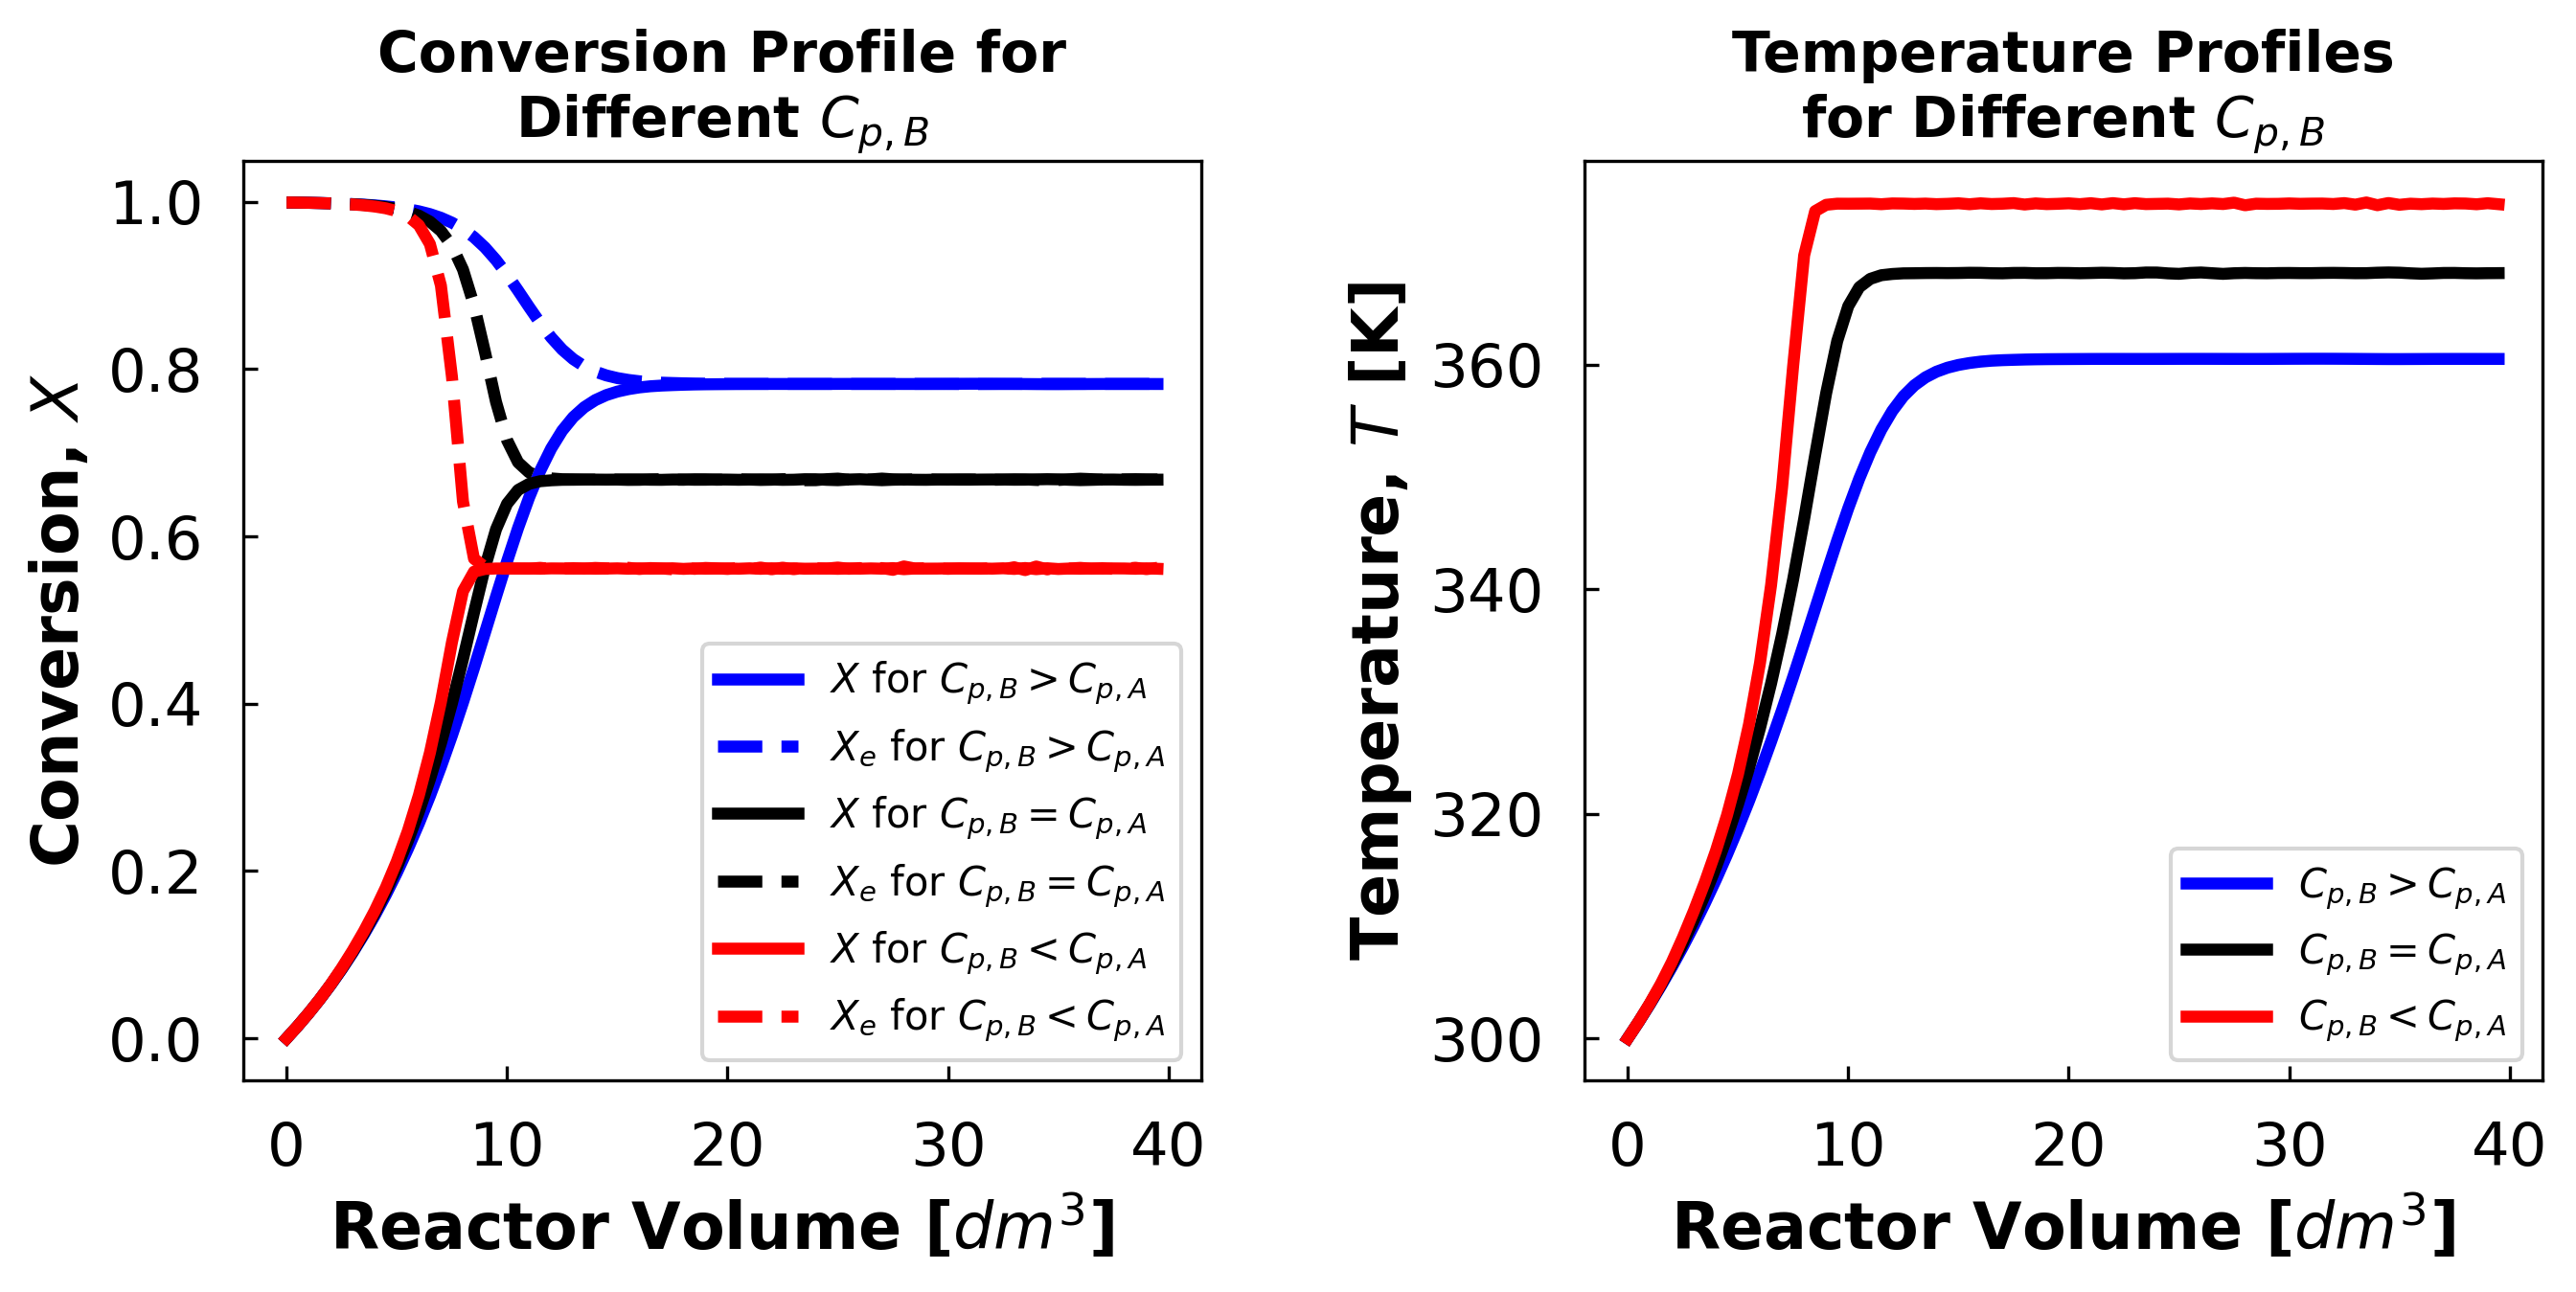

In [ ]:
# testing the generalized plotting function
labels =  [
    "$C_{p,B} > C_{p,A}$",
    "$C_{p,B} = C_{p,A}$",
    "$C_{p,B} < C_{p,A}$"
]

C_pB_levels = [240, 160, 80]

# param = [T0, theta_I, alpha, C_pA, C_pB, C_pI]

plot_profiles('$C_{p,B}$', 4, C_pB_levels, 'Temperature', labels)

#### ii) Discussion

Comment on the effect of having $ΔC_P \neq 0$ (compare plots 3b and 3c)

A higher product heat capacity is beneficial in all cases for this reaction because this reaction is limited by equilibrium. And the equilibrium conversion is negatively affected by temperature. Having a product with a high heat capacity means the product will act as a heat sink and prevent the reaction mixture temperature from rising easily. 

This, in turn, prevents the equilibrium conversion from dropping deeper into the reactor, allowing exit conversion to reach larger values.

### 3c. Effect of Pressure Drop


#### i) Solve and plot 

Solve and plot for the case where pressure drop is ignored ($\alpha = 0 \Rightarrow dp/dW=0$)

The exit conversion at α = 0 is 66.77%

The exit conversion at α = 0.01 is 66.77%

The exit conversion at α = 0.02 is 66.77%



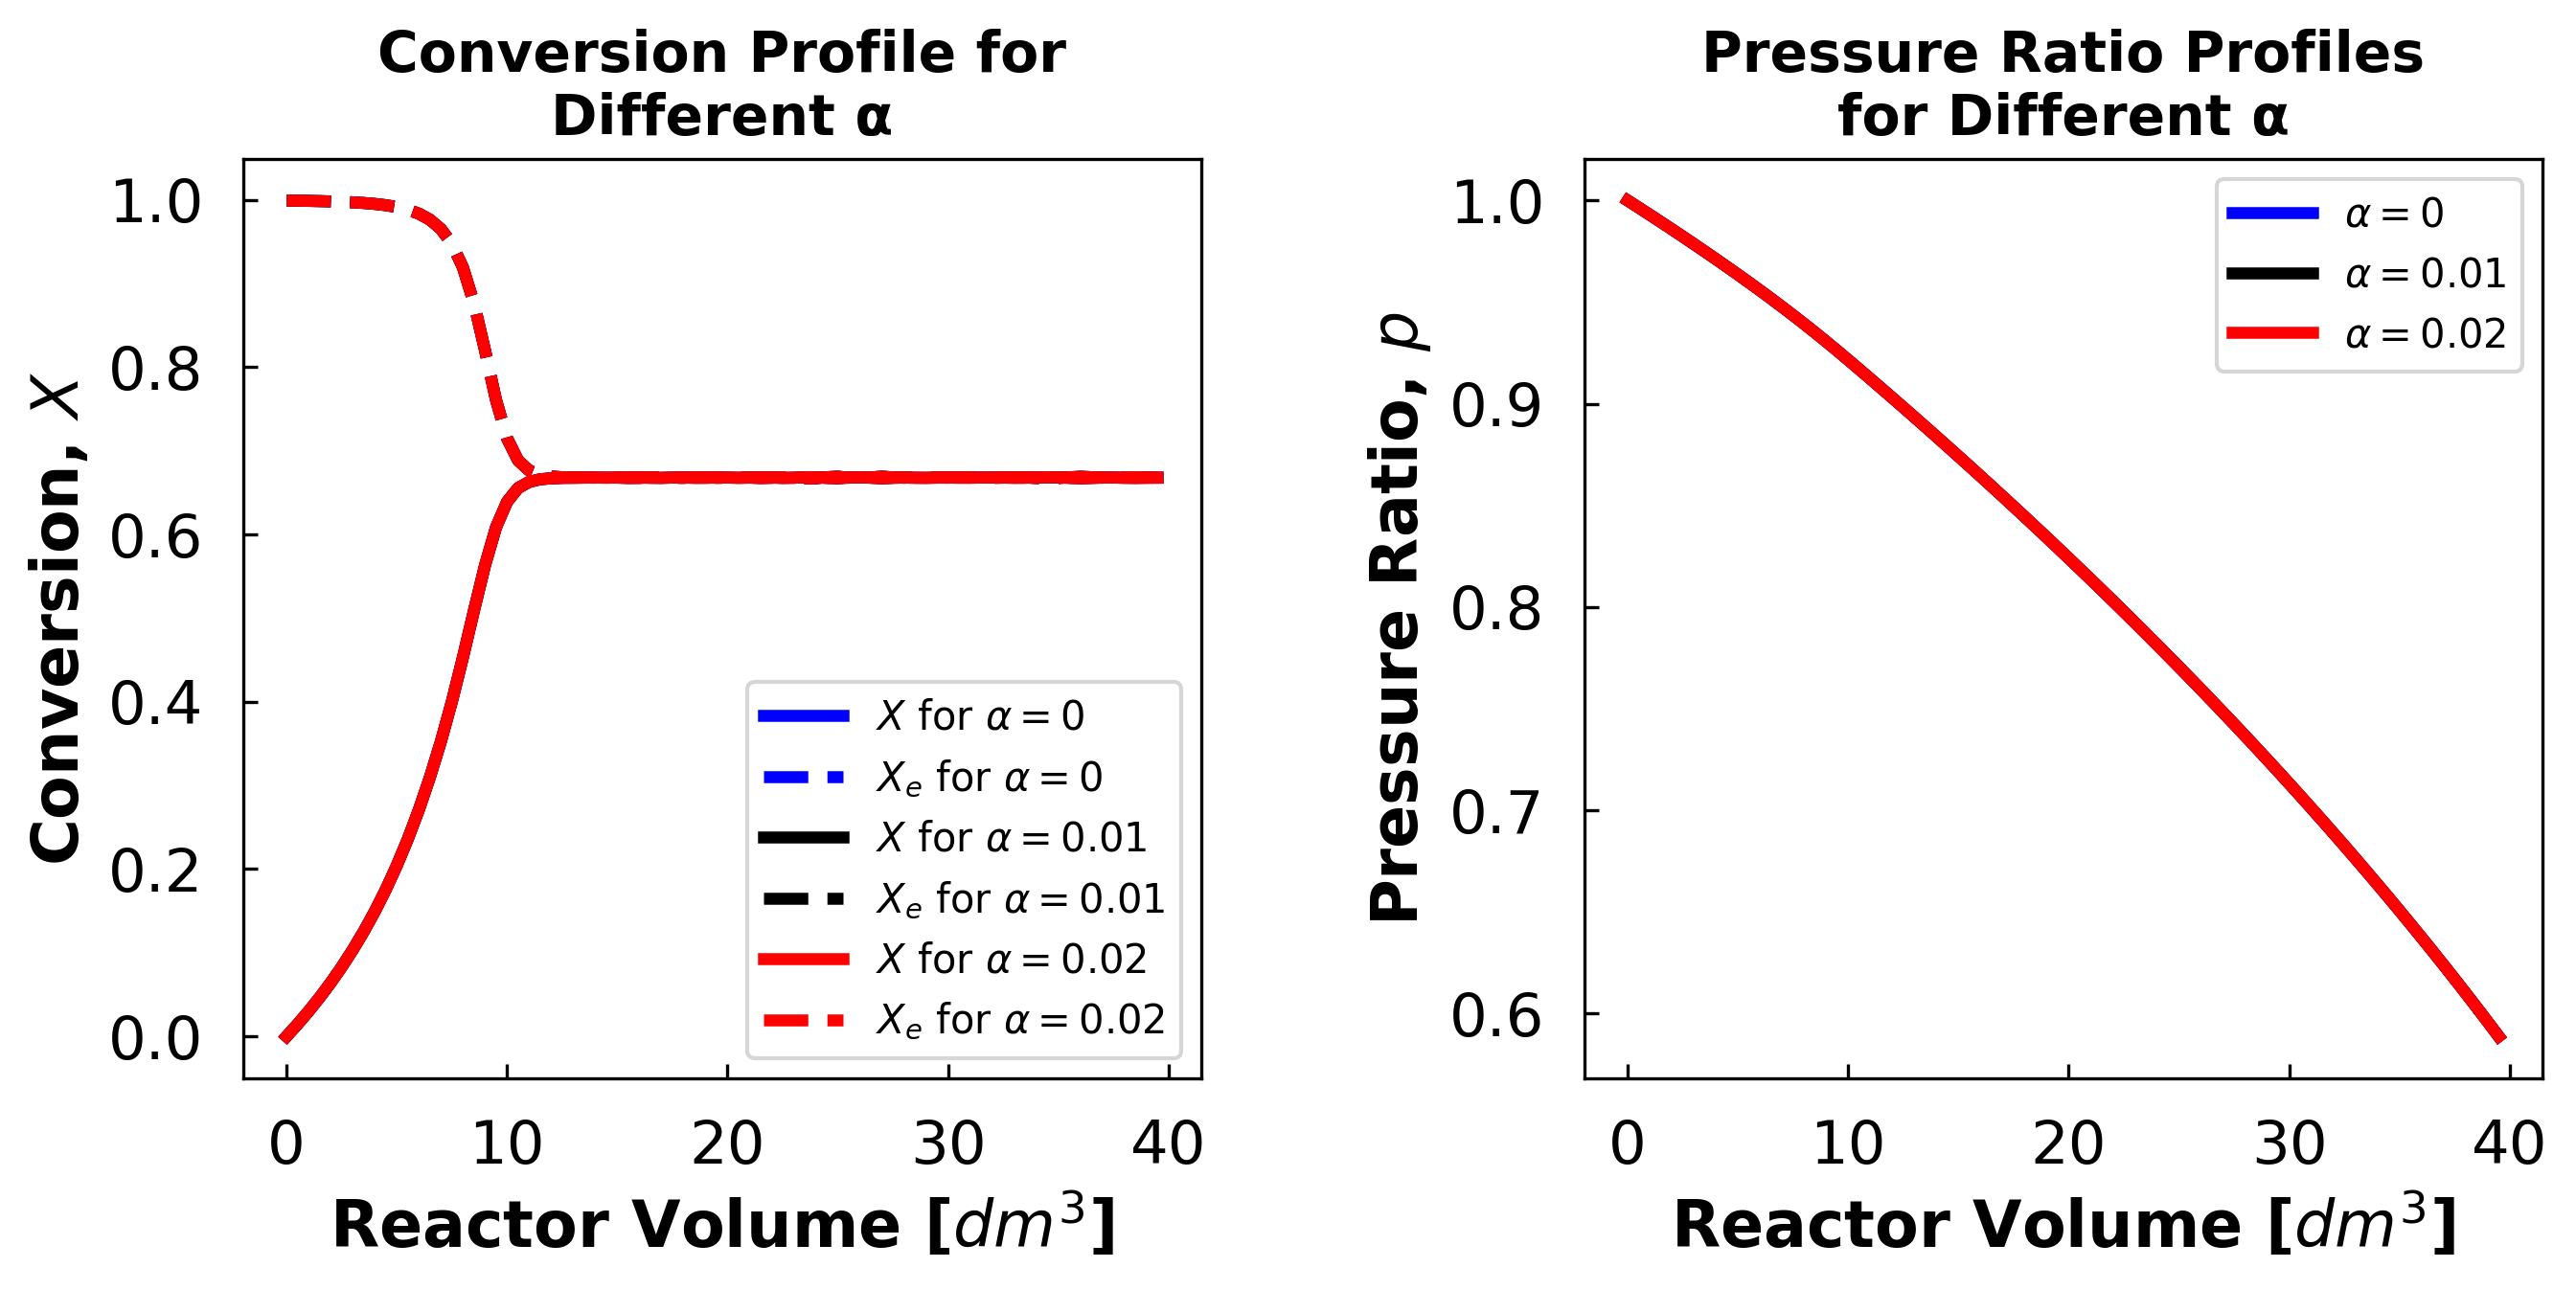

In [ ]:
# Setting up variables
labels =  [
    r"$\alpha = 0$",
    r"$\alpha = 0.01$",
    r"$\alpha = 0.02$"
]

alpha_levels = [0, 0.01, 0.02]

colors = ["blue", "black", "red"]

# Add your solution here

#### ii) Comment on the effect of including pressure drop

The effect of omitting pressure drop is very small in this case, because the equilibrium position of this reaction is not affected by pressure.

Le Chatelier's principle says that increasing pressure should push the equilibrium position to whichever side of the reaction has less mols. However, this reaction has the same number of mols on both sides ($A + I ⟷ B + I$).


## 4. Optimal Way to Control Reactor Temperature


### 4a. Effect of $Θ_I$

Solve for a set of cases where the fraction of inerts in the inlet varies $Θ_I=[0,10]$ and analyze the effect of the fraction of inerts on the exit conversion.

#### i) Sensitivity analysis

Solve for a set of fraction of inerts (set of thetas) using solve_pbr. Hint: Use a for-loop



In [ ]:
# list of theta_I values 
Theta0_list = np.arange(0, 10, 0.1)

# Add your solution here

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


#### ii) Visualize

Plot exit conversion Xout vs Theta Initial and comment on the effect of inert concentration on exit conversion. (4-6 sentences)

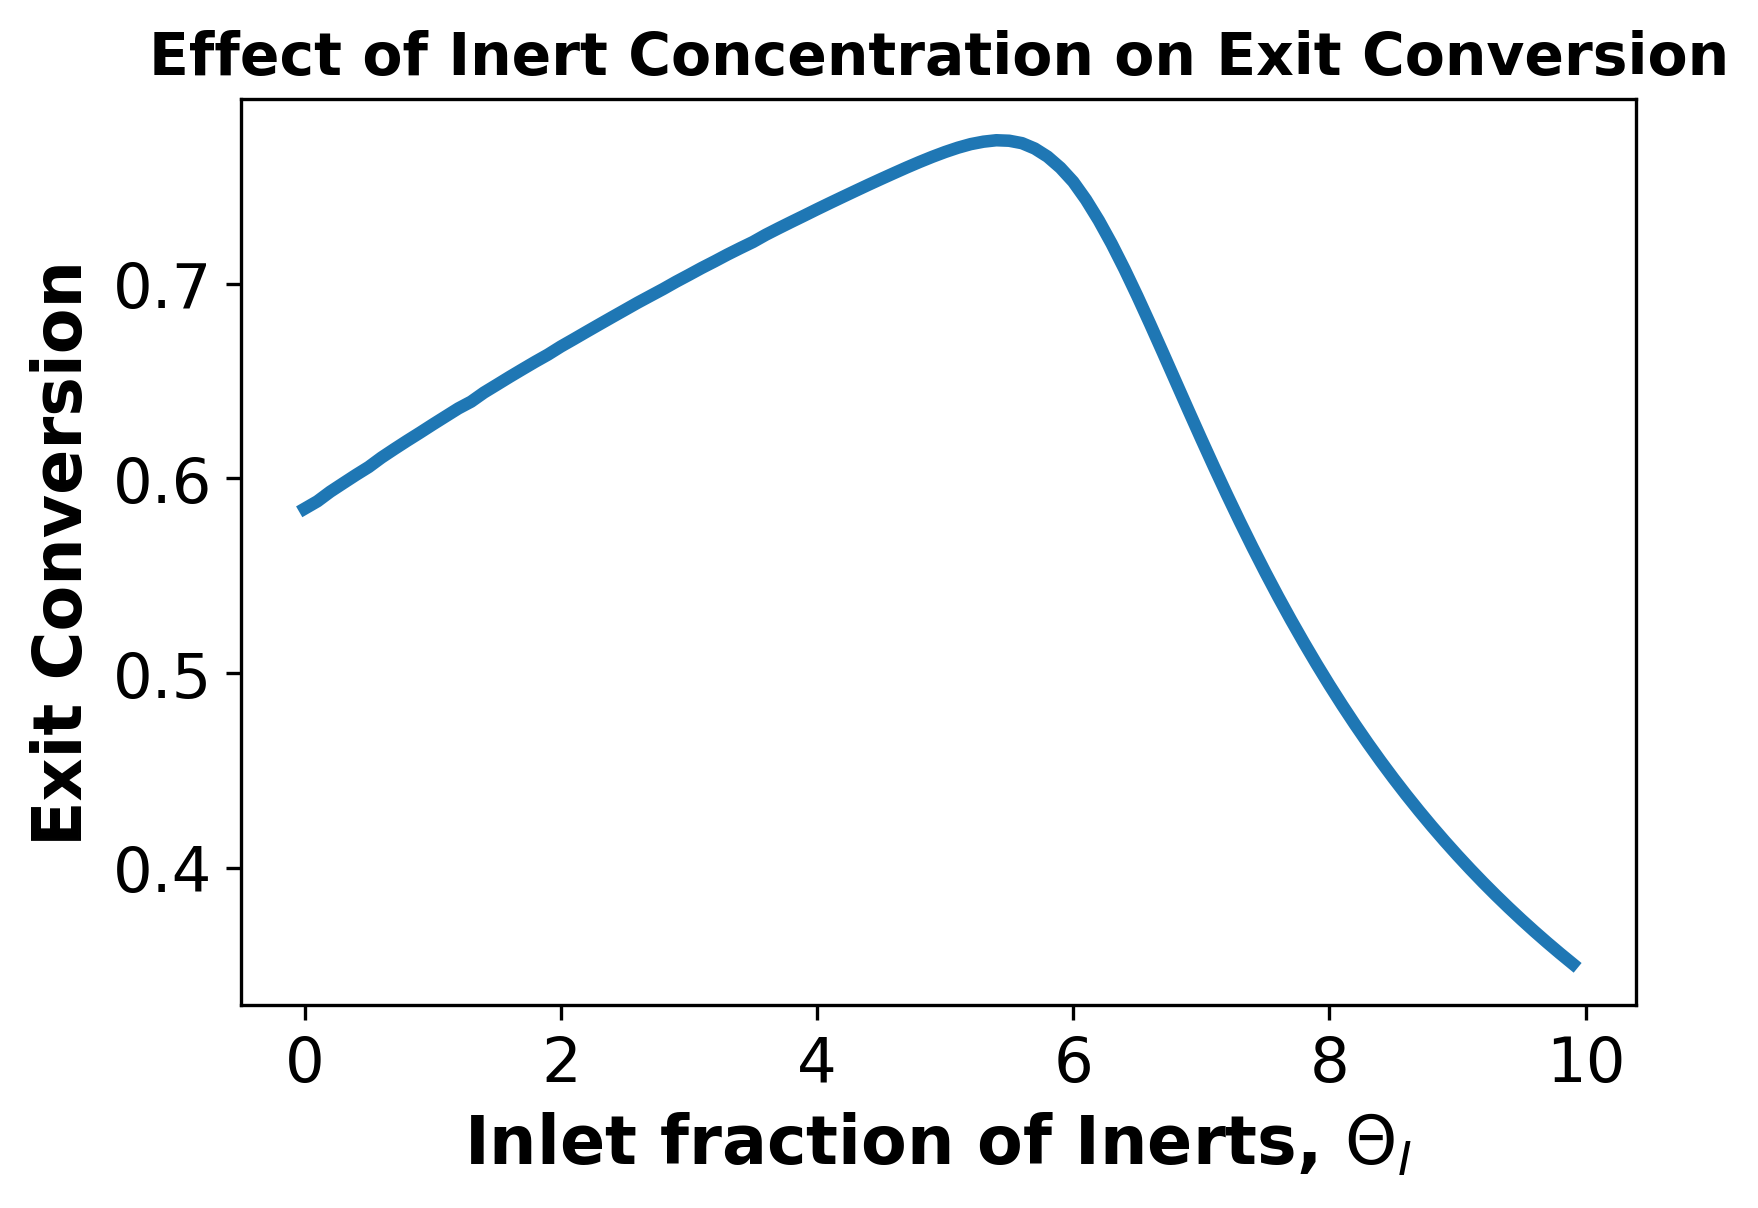

In [ ]:
#plotting the exit conversion vs theta (ratio of inert to reactive species)

# Add your solution here

ii) Student Comments:

In the region of low theta, the increase in inert gas increases the conversion as the inert gas acts as a heat sink by nature of having a heat capacity. See plots below for examination of this in further detail.

After a certain point, however, we see that further increasing theta causes a drop in conversion. This is a result of there being too high of a ratio of inert to reactive species for the reactive species to interact and the reaction to occur at a high rate. See plots below for examination of this in further detail.


iii) Now let us examine why we have that trend in exit conversion resulting from different fractions of inert. 

Examine the trend at low theta by:

Plotting conversion (X and Xe) profiles vs reactor volume at thetas 0, 2, and 4 and the same for temperature (T) vs reactor volume on a second subplot. Use these plots to comment on how the fraction of inert affects the temperature and in turn the exit conversion. (2-3 sentences)

Examine the trend at high theta by:

Plotting conversion (X and Xe) profiles vs reactor volume at thetas 6, 8, and 10 and the same for rate of consumption of A vs reactor volume on a second subplot. Use these plots to comment on how high fractions of inert affect the rate of consumption and exit conversion. (2-3 sentences)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars


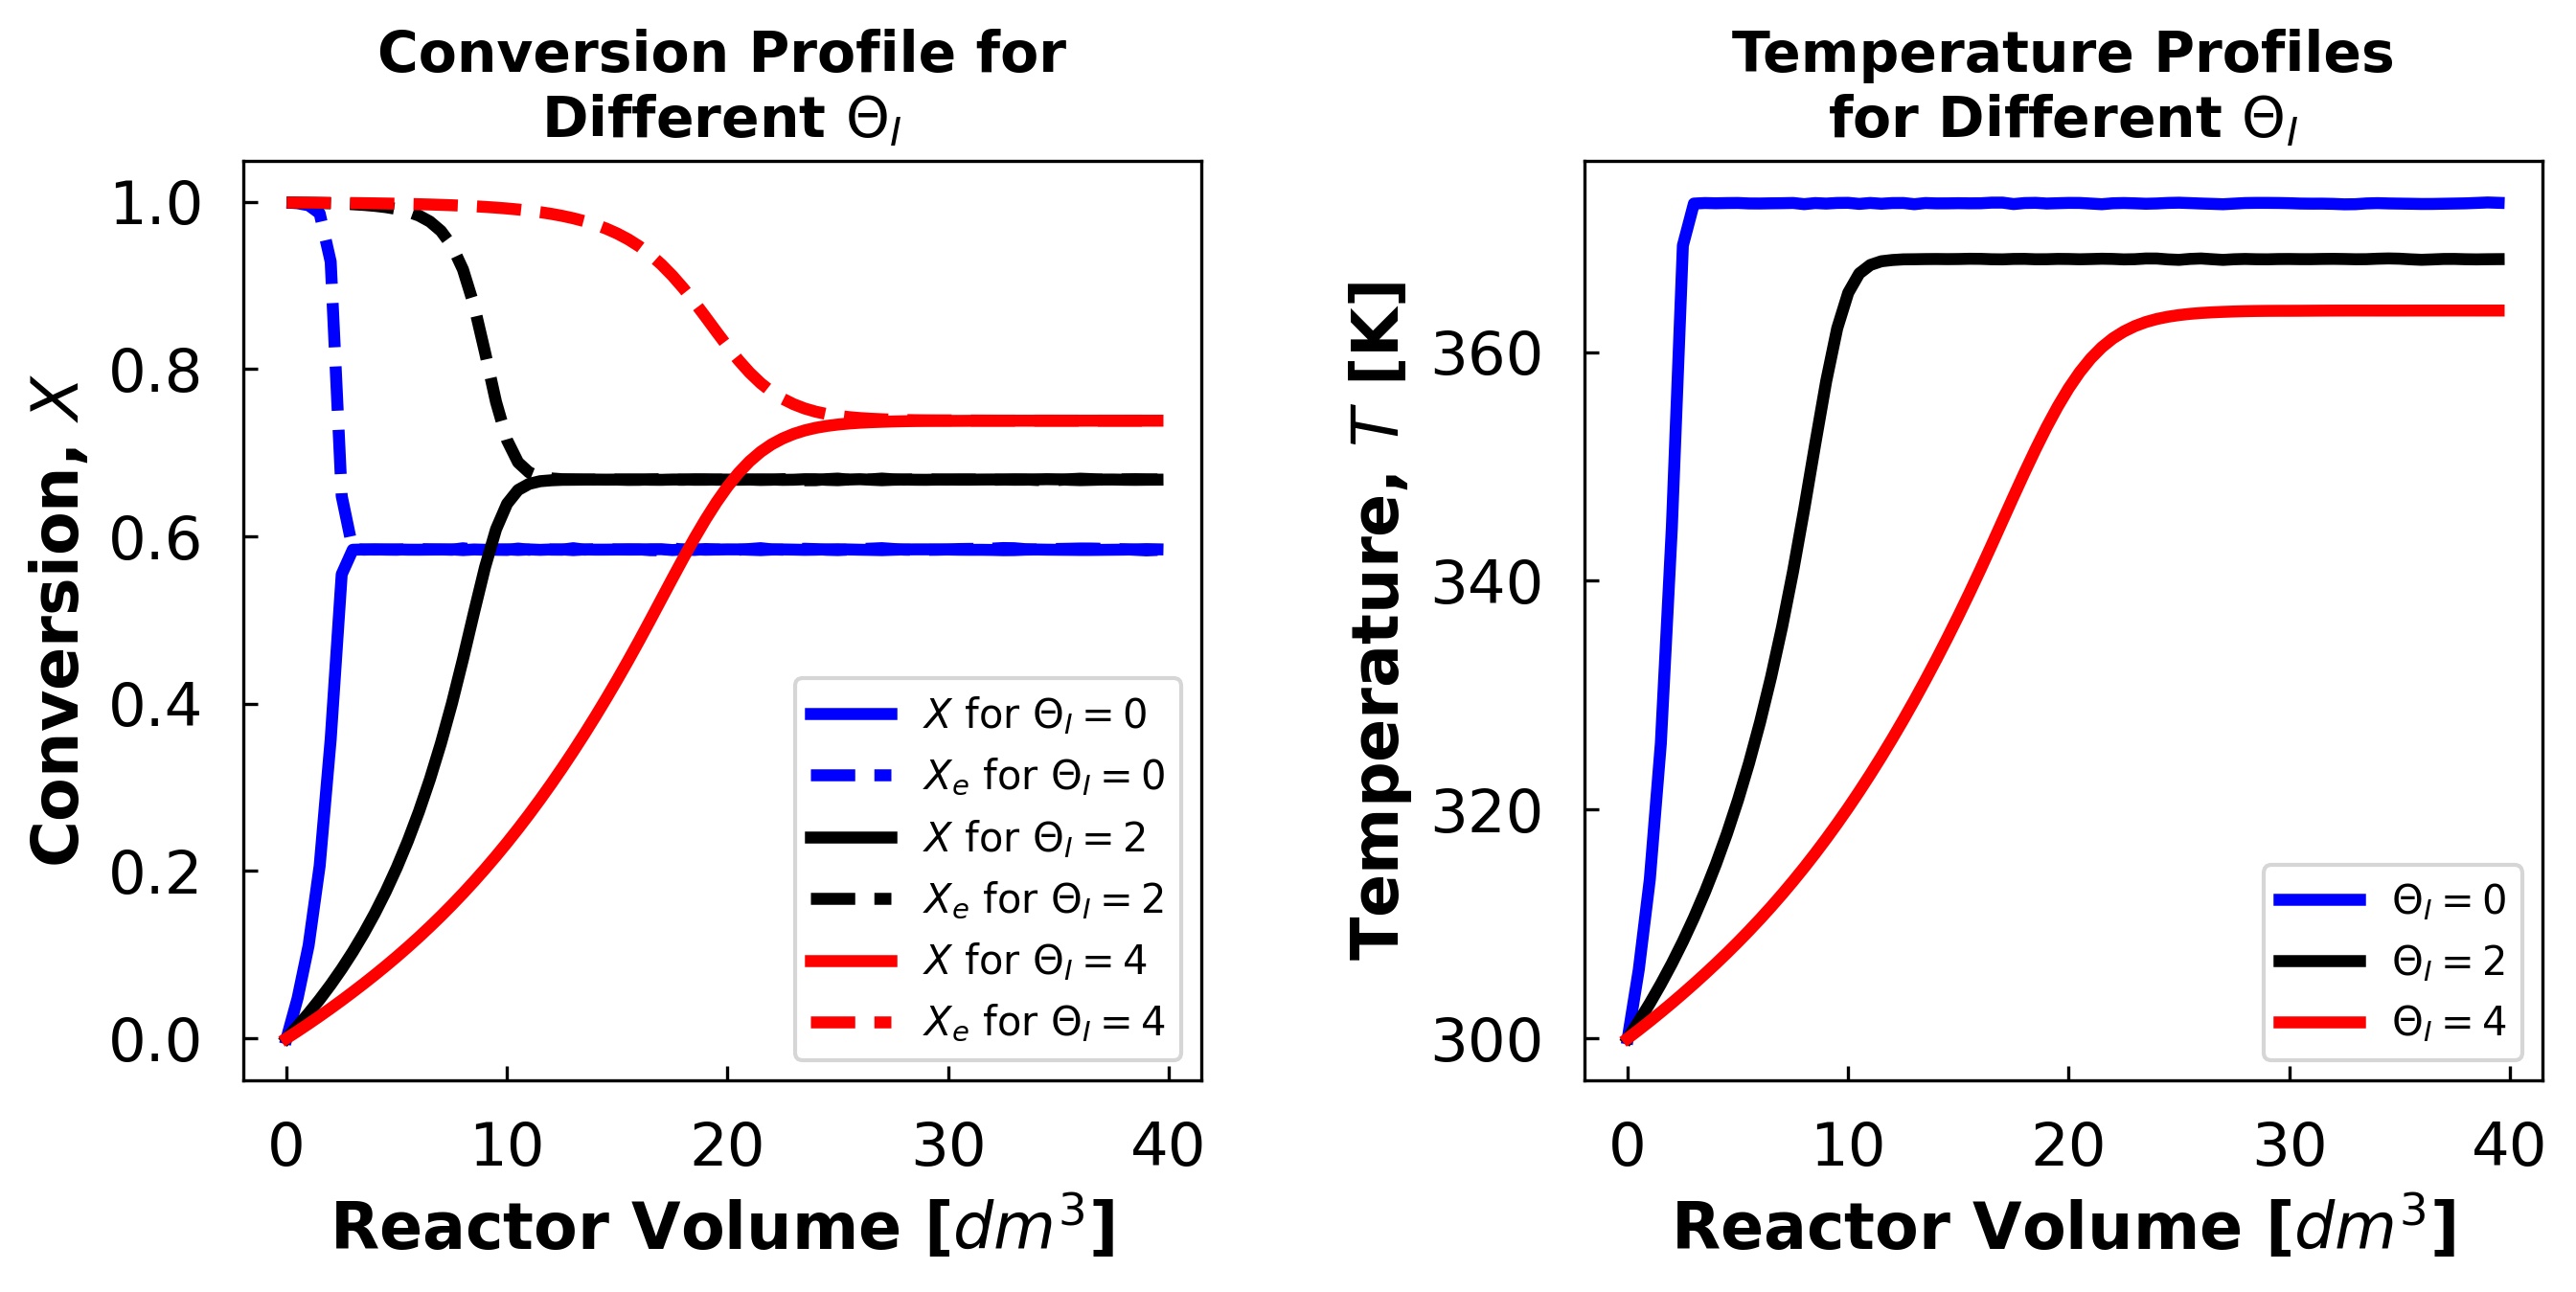

In [ ]:
theta0_list = [0,2,4]

# Add your solution here

iii) Student Comments on Low Theta Plots:

Above we see that at low inert concentrations equilibrium occurs at a higher temperature which corresponds to a lower exit conversion. This leads us to believe that the inert molecules are acting as a heat sink which in turn allows the reaction to occur at a lower temperature which leads to a higher conversion.

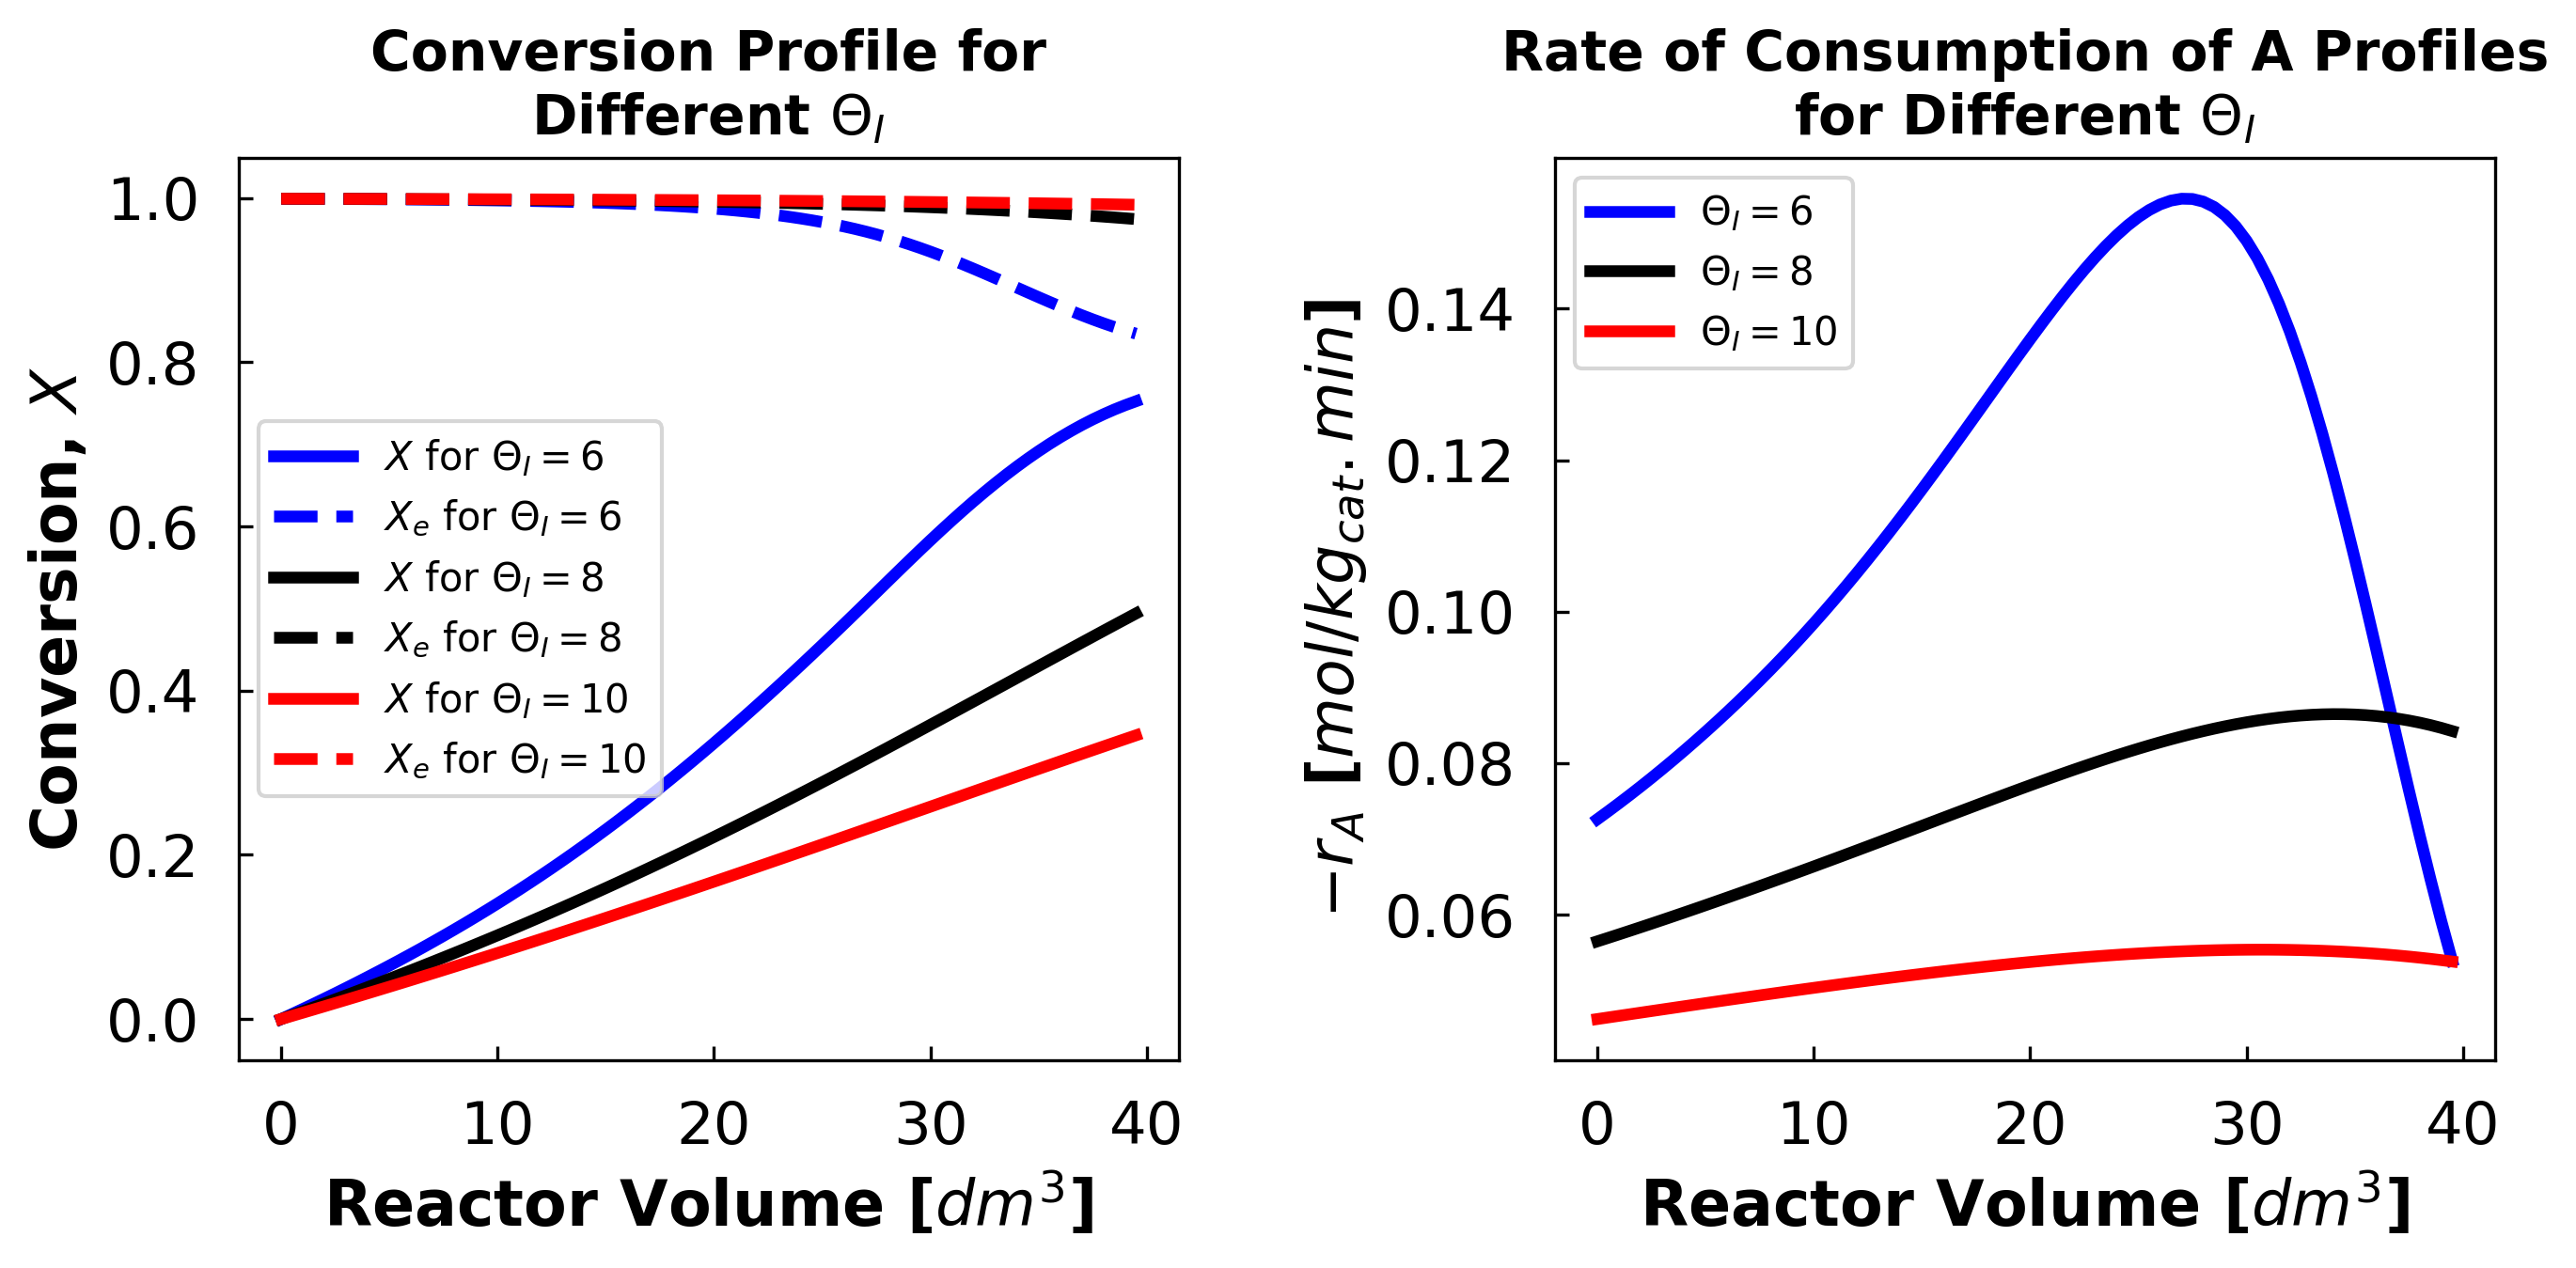

In [ ]:
#list of thetas we are examining
theta0_list = [6,8,10]

# Add your solution here

iii) Student Comments on High Theta Plots:

Above we see that we do not reach equilibrium at high thetas (X and Xe do not meet and we do not see the full pattern of a peak followed by a drop to an equilibrium rate in the rate of consumption plot). At high theta values the inert in essence drowns out the reactive species, preventing sufficient reaction to achieve equilibrium.


### 4b. Effect of $T_0$

Solve for a set of cases where the inlet temperature varies $T_0=[280,350]$ K

#### i) Sensitivity analysis

Solve for a set of Inlet Temperatures using solve_pbr. Hint: Use a for-loop just as in 4a


In [ ]:
#create list of initial temperatures
T0_list_full = list(range(280,350))

# Add your solution here

#### ii) Visualize

Plot exit conversion $X_{out}$ vs $T_0$ and comment on the effect of inlet temperature. (1 sentence)

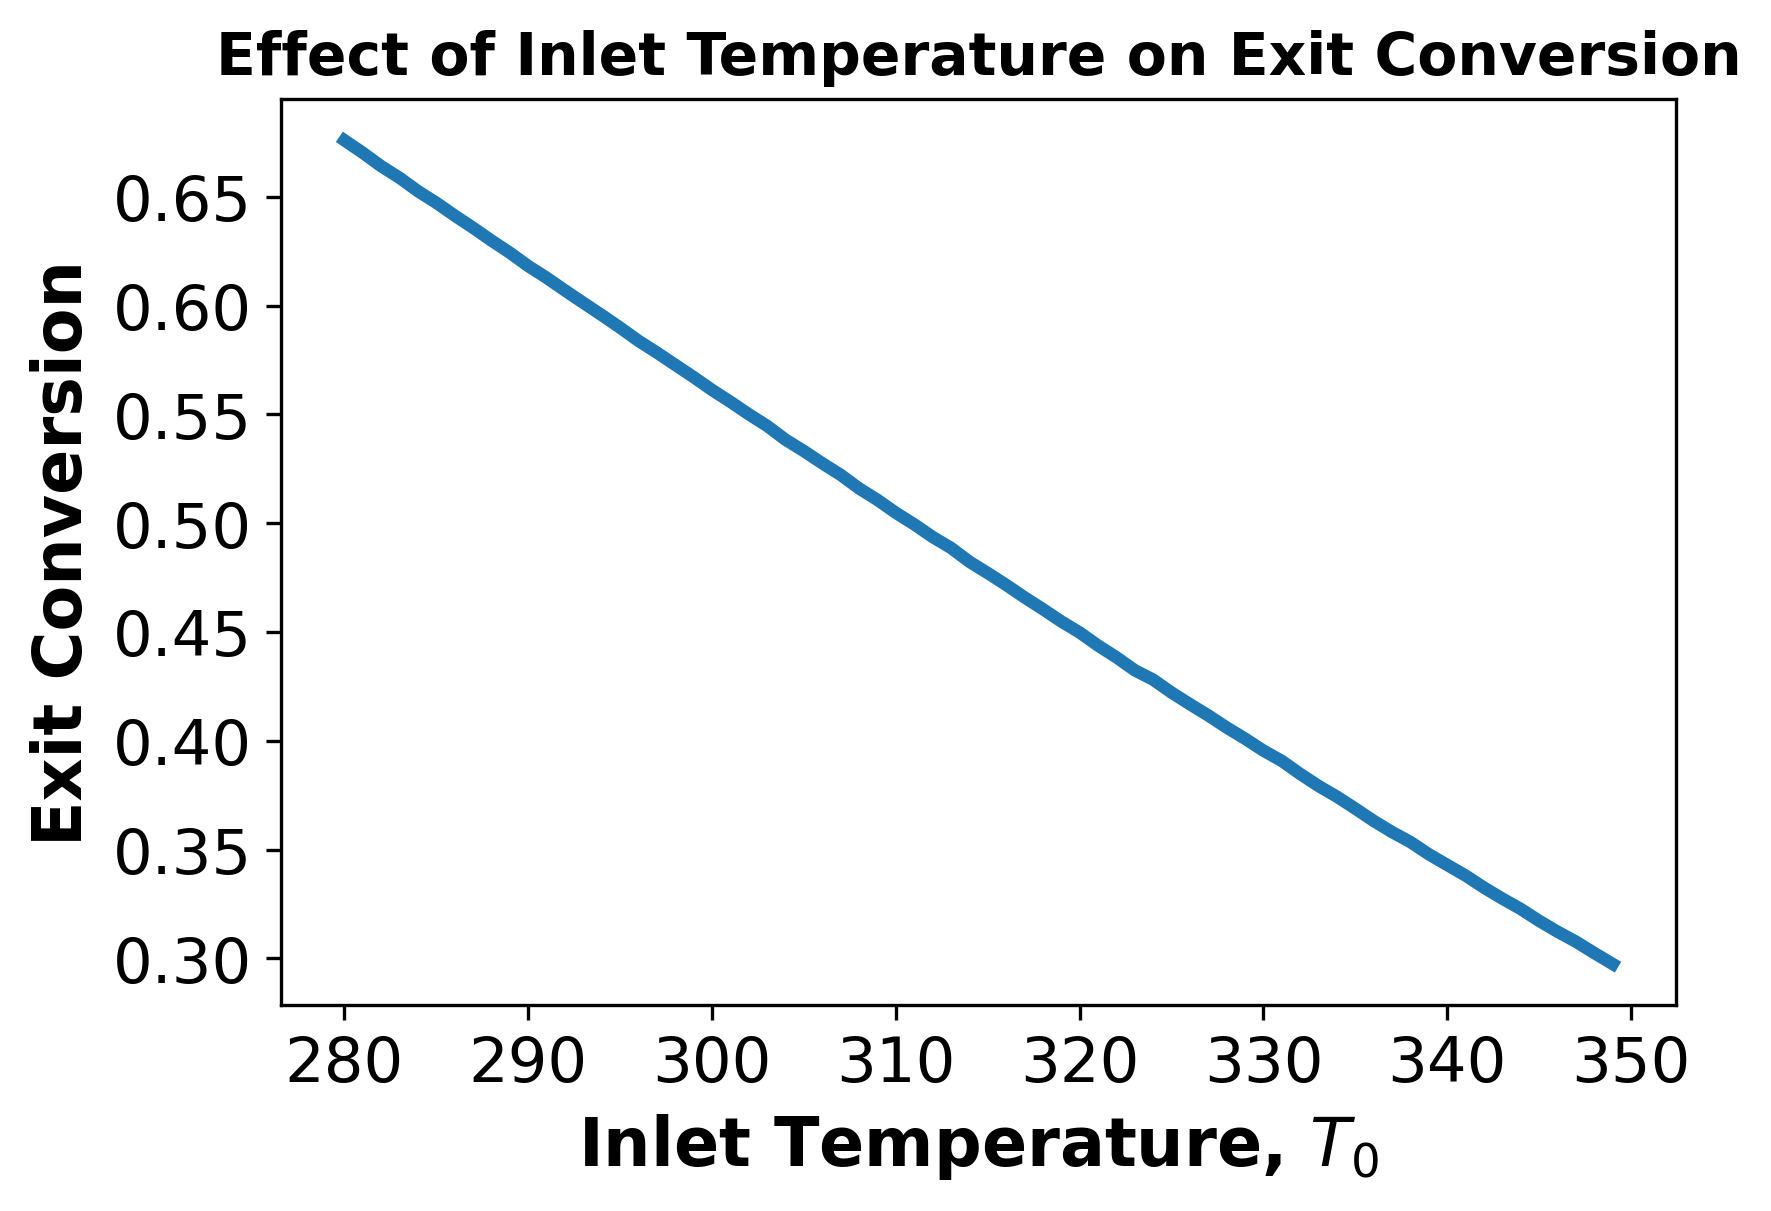

In [ ]:
#plot exit convertion vs initial temperature

# Add your solution here


ii) Student Comment:

Above we see that as the inlet temperature increases, the exit conversion decreases.

iii) Now let us examine why we have that trend in exit conversion resulting from different initial temperatures.

Plot conversion (X and Xe) profiles vs reactor volume at initial temperatures: 280K, 300K, 350K and the same for temperature (T) vs reactor volume on a second subplot. 

Use these plots to comment on how initial temperature affects the equilibrium temperature and in turn the exit conversion. (2-3 sentences).

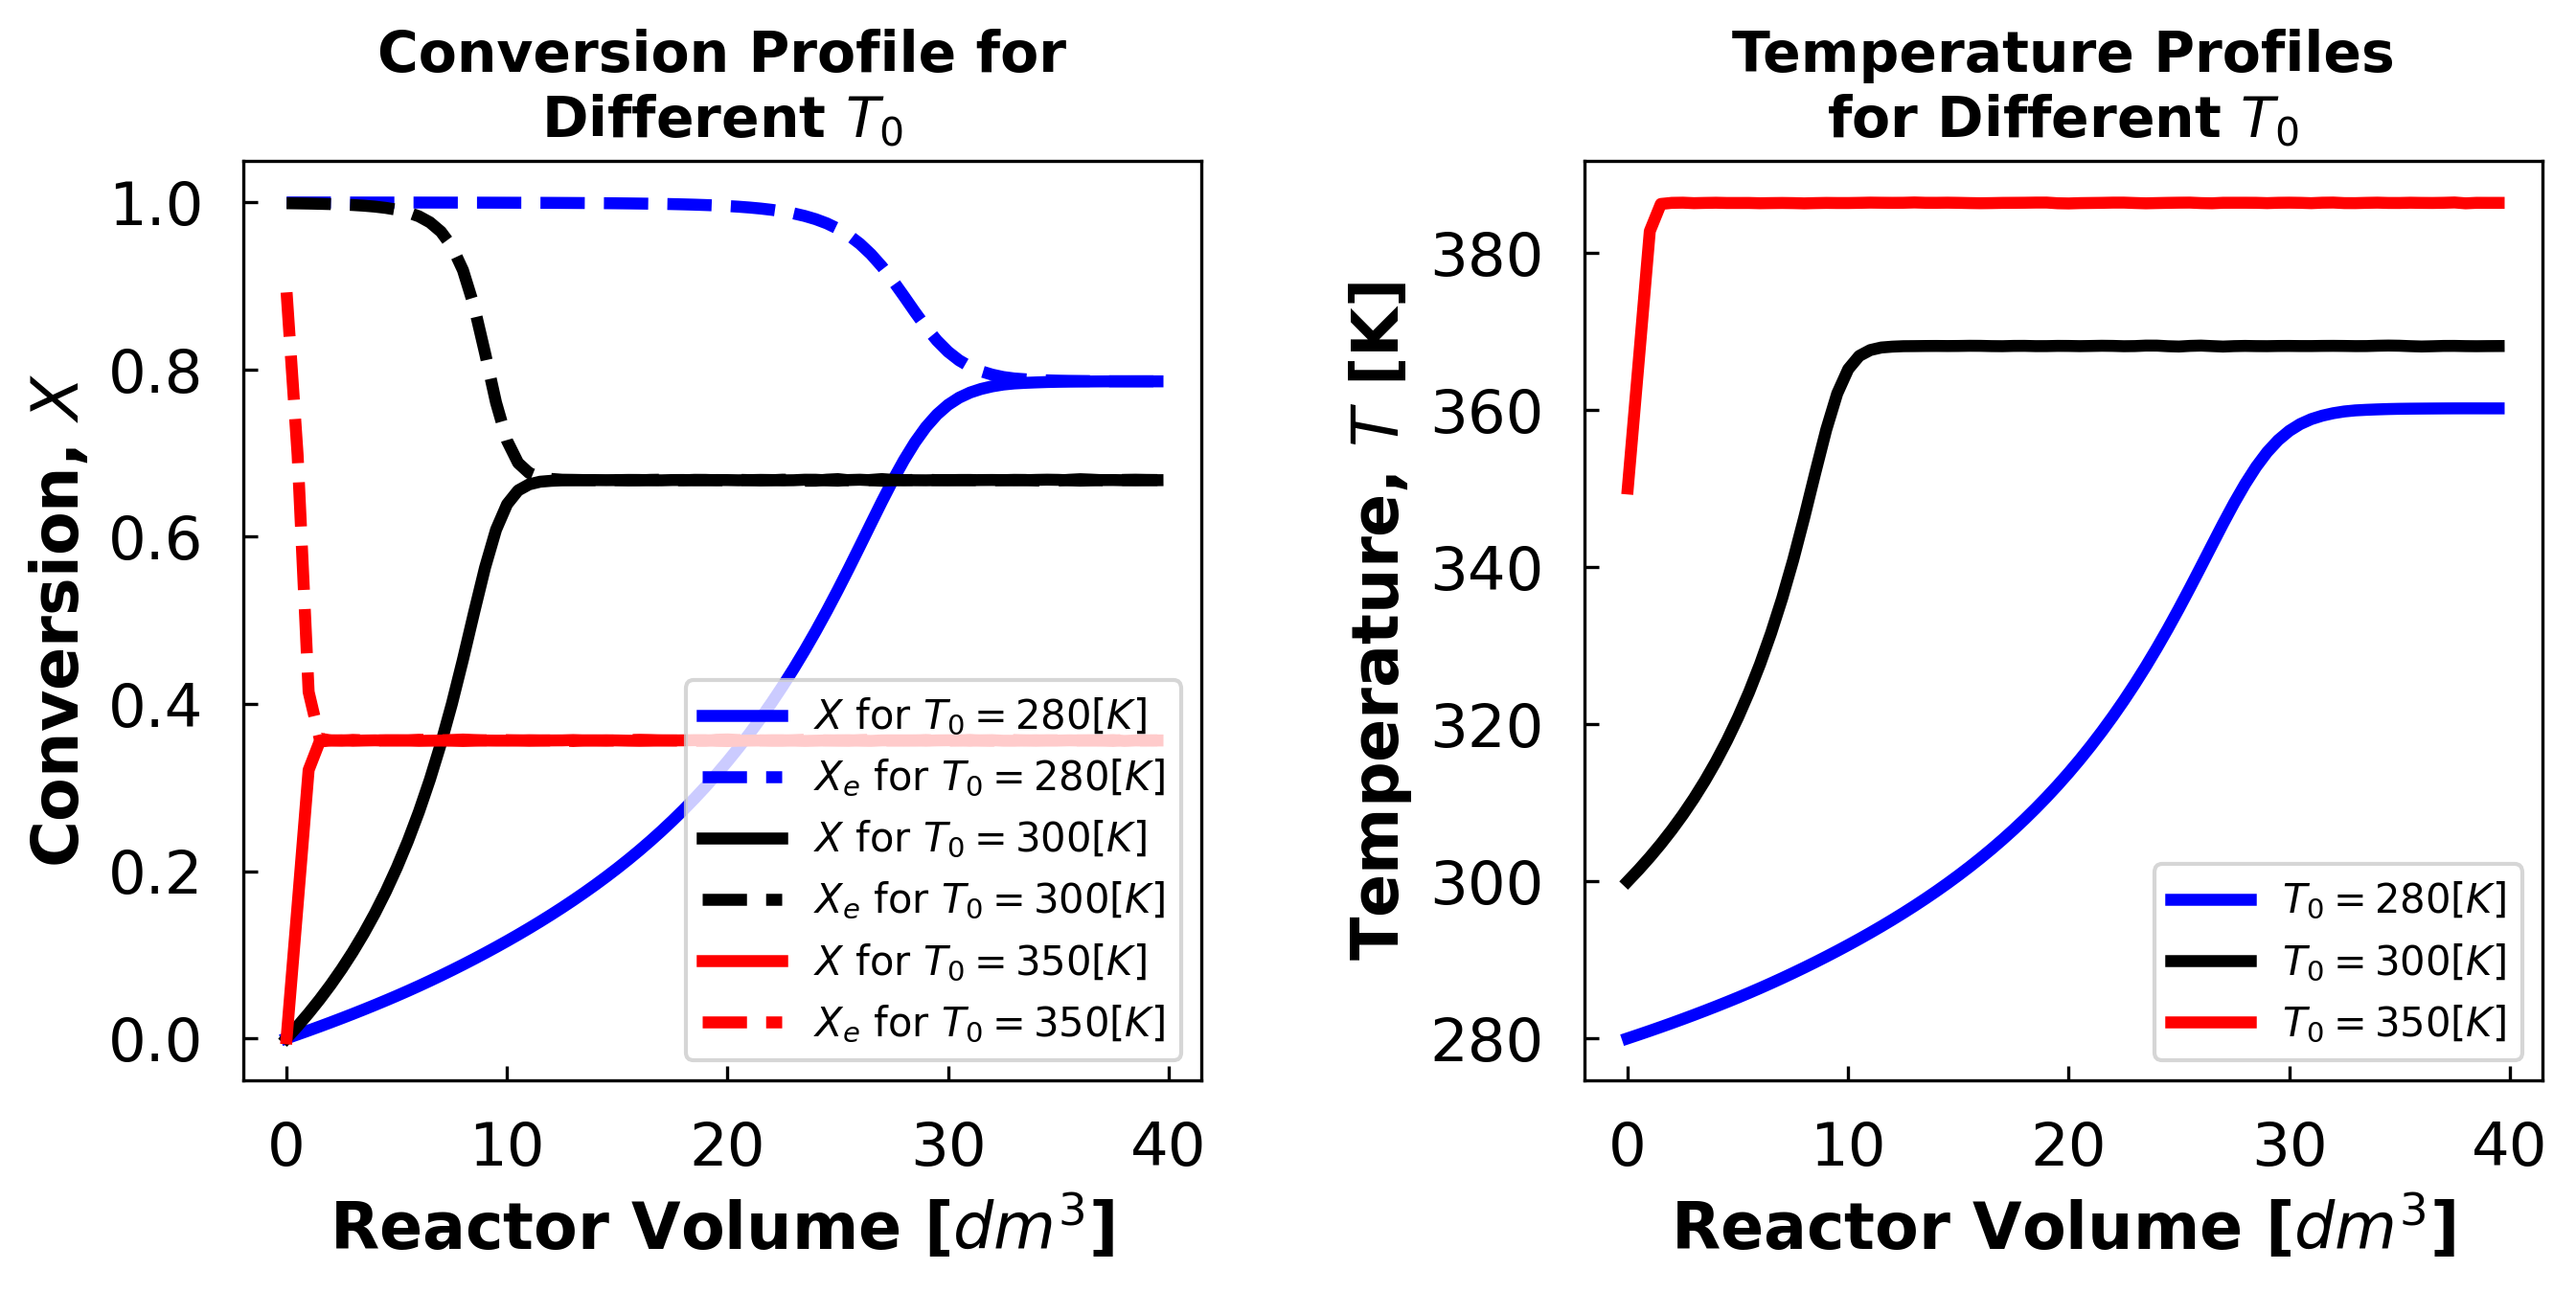

In [ ]:
labels =  [
    r"$T_0 = 280 [K]$",
    r"$T_0 = 300 [K]$",
    r"$T_0 = 350 [K]$",
]

T0_list = [280, 300, 350]

# Add your solution here

Student Comments:

Above we see that as temperature increases, the temperature that equillibrium occurs at increases and the conversion decreases. This suggests that the reaction rate in inversly dependent on temperature with the reaction rate being faster when at lower temperatures.

### 4c. Optimal Temperature Control

Using the function `solve_pbr()`, find the optimal combination of $Θ_I$ and $T_0$ that maximizes $X_{out}$. Display in a contour plot. Comment on the optimization results and the trends in the contour plot (5-6 sentences).

Hint: Use a nested for-loop.

For information on making quality plots see:
https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html

In [ ]:
# Add your solution here

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib

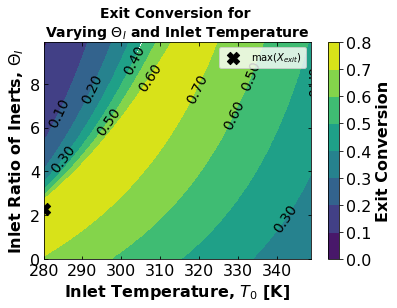

In [ ]:
# converting list of exit conversions for different theta_I and temp_I to an array
X_optim = np.array(X_for_theta_and_temp)

# Plotting contours for X vs. T0 and Theta_I
cs = plt.contourf(
    T0_list_full, Theta0_list, X_optim,
    # levels=50,
    )

# plot color bar
cbar = plt.colorbar()

# plot title in color bar
cbar.ax.set_ylabel(r'Exit Conversion', fontsize=16, fontweight='bold')

# set font size in color bar
cbar.ax.tick_params(labelsize=16)
plt.clabel(cs, fmt='%2.2f', colors='k', fontsize=14)

# define tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)

# plot title and x,y label
plt.xlabel('Inlet Temperature, $T_0$ [K]', fontsize=16, fontweight='bold')
plt.ylabel('Inlet Ratio of Inerts, $\Theta_I$', fontsize=16, fontweight='bold')
plt.title('Exit Conversion for \nVarying $\Theta_I$ and Inlet Temperature', fontsize=14, fontweight='bold')

#------------------------------------------------------------------
# Adding points where X is maximized
# Add your solution here

In [ ]:
# printing maximum exit conversion and optimal conditions for it
Xmax = X_optim[ind_max].copy()
Xmax.tolist()
print(
    "Maximum Exit Conversion: ", 
      round(Xmax[0]*100, 2),"%",
    "\nOptimal Initial Temperature: ", 
      T0_list_full[ind_max[1][0]], " K ",
      "\nOptimal Initial Theta: ",
      round(Theta0_list[ind_max[0][0]], 2)
      )

Maximum Exit Conversion:  79.58 % 
Optimal Initial Temperature:  280  K  
Optimal Initial Theta:  2.3


Student Comments:

Here we can see that if we want to optimize for the highest exit conversion possible optimal initial conditions for initial theta and temperature conditions lie in the yellow region. 

The maximum exit conversion specifically results from an initial temperature (lowest in our range) and initial theta 2.3. 

The contour plot, however, reveals a more nuanced depiction of optimal initial conditions.
If we choose to use a low theta initial (0-2) we should use low temperatures (280 K), but if we use a much higher theta initial (8-9) the optimal temperature is much higher (310 K) with a smooth curve inbetween as an optimal range.

While our earlier analysis had suggested high temperatures lead to lower conversion, we see here that at high theta, low temperatures can also be detrimental to conversion. This is likely because energy from the higher temperatures are needed for the interactions between reactive molecules to occur when they are at such low proportion to the inert molecules. Hence, there is an ideal temperature range at high theta initials, with both higher and lower temperatures limiting conversion.